## Pandas workout

In [875]:
import pandas as pd
import numpy as np

### Exercise 01: Test scores

Create a series of 10 elements, random integers from 70 to 100.

In [18]:
values = np.random.randint(70, 101, 10)
values

array([87, 70, 75, 81, 95, 73, 79, 78, 96, 77])

In [22]:
s = pd.Series(values)
s

0    87
1    70
2    75
3    81
4    95
5    73
6    79
7    78
8    96
9    77
dtype: int64

Set the index with months.

In [25]:
s.index = 'Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split()
s

Sep    87
Oct    70
Nov    75
Dec    81
Jan    95
Feb    73
Mar    79
Apr    78
May    96
Jun    77
dtype: int64

A more concise way to construct the series is below.

In [28]:
months = 'Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split()
s = pd.Series(values, index=months)
s

Sep    87
Oct    70
Nov    75
Dec    81
Jan    95
Feb    73
Mar    79
Apr    78
May    96
Jun    77
dtype: int64

Calculate mean value of the series.

In [31]:
s.mean()

81.1

In [33]:
first_half_average = s.iloc[:5].mean()
first_half_average

81.6

In [35]:
first_half_average = s.loc['Sep':'Jan'].mean()
first_half_average

81.6

In [37]:
s.head()

Sep    87
Oct    70
Nov    75
Dec    81
Jan    95
dtype: int64

In [39]:
s.tail()

Feb    73
Mar    79
Apr    78
May    96
Jun    77
dtype: int64

### Exercise 04: Descriptive statistics

Generate a series of 100,000 floats in a normal distribution with a mean of 0 and a std of 100.

In [49]:
values = np.random.normal(0, 100, 100000)
s = pd.Series(values)

Get the descriptive statistics for this series. How close are the mean and the median?

In [52]:
s.count()

100000

In [54]:
s.mean()

-0.5881071886611104

In [56]:
s.std()

99.57734411615618

In [58]:
s.min()

-498.68420992666967

In [60]:
s.max()

466.9338773478979

In [62]:
s.quantile(0.25)

-67.834232555016

In [64]:
s.quantile(0.5)

-0.39849821865973956

In [66]:
s.quantile(0.75)

66.63126276962596

In [68]:
s.describe()

count    100000.000000
mean         -0.588107
std          99.577344
min        -498.684210
25%         -67.834233
50%          -0.398498
75%          66.631263
max         466.933877
dtype: float64

Replace the minimum value with 5 times the maximum value.

In [77]:
i_min, i_max = s.idxmin(), s.idxmax()

In [79]:
s.iloc[i_min] = 5.0 * s.iloc[i_max]

Get the decriptive statistics again.

In [82]:
s.describe()

count    100000.000000
mean         -0.559774
std          99.838372
min        -421.040965
25%         -67.832777
50%          -0.397832
75%          66.632505
max        2334.669387
dtype: float64

### Exercise 05: Monday temperatures

Generate 4 weeks temperatures.

In [92]:
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'] * 4
temps = np.round(np.random.normal(20, 5, len(days)))

In [94]:
s = pd.Series(temps, index=days)
s

Sun    21.0
Mon    16.0
Tue    29.0
Wed    20.0
Thu    32.0
Fri    25.0
Sat    24.0
Sun    23.0
Mon    25.0
Tue    16.0
Wed    17.0
Thu    20.0
Fri    17.0
Sat    23.0
Sun    28.0
Mon    13.0
Tue    20.0
Wed    19.0
Thu    18.0
Fri    13.0
Sat    25.0
Sun    18.0
Mon    13.0
Tue    16.0
Wed    31.0
Thu    12.0
Fri    20.0
Sat    19.0
dtype: float64

What was the mean temperature on Mondays during this period?

In [99]:
s_mon = s.loc['Mon']
s_mon

Mon    16.0
Mon    25.0
Mon    13.0
Mon    13.0
dtype: float64

In [103]:
mon_avg_temp = s_mon.mean()
mon_avg_temp

16.75

### Exercise 06: Passenger frequency

What percentage of taxi rides had only one passenger versus the (theoretical) maximum of six passengers?

In [111]:
s = pd.read_csv('data/taxi-passenger-count.csv', header=None).squeeze()
s

0       1
1       1
2       1
3       1
4       1
       ..
9994    1
9995    1
9996    1
9997    6
9998    1
Name: 0, Length: 9999, dtype: int64

In [113]:
s.loc[s == 1].count()

7207

In [115]:
s.loc[s == 6].count()

369

In [117]:
s.value_counts()

0
1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: count, dtype: int64

In [119]:
s.value_counts()[[1, 6]]

0
1    7207
6     369
Name: count, dtype: int64

In [121]:
s.value_counts(normalize=True)[[1, 6]]

0
1    0.720772
6    0.036904
Name: proportion, dtype: float64

### Exercise 07: Long, medium, and short taxi rides

Modify the series containing category names rather than numbers.

In [129]:
s = pd.read_csv('data/taxi-distance.csv', header=None).squeeze()
s

0       1.63
1       0.46
2       0.87
3       2.13
4       1.40
        ... 
9994    2.70
9995    4.50
9996    5.59
9997    1.54
9998    5.80
Name: 0, Length: 9999, dtype: float64

In [131]:
# bin boundaries are exclusive on the left and inclusive on the right!
categories = pd.cut(s,
                    bins=[0, 2, 10, s.max()],
                    include_lowest=True,
                    labels=['short', 'medium', 'long'])
categories

0        short
1        short
2        short
3       medium
4        short
         ...  
9994    medium
9995    medium
9996    medium
9997     short
9998    medium
Name: 0, Length: 9999, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [133]:
categories.value_counts()

0
short     5890
medium    3402
long       707
Name: count, dtype: int64

### Exercise 08: Net revenue

In [139]:
df = pd.DataFrame({'product_id': [23, 96, 97, 15, 87],
                   'name': ['computer', 'Python workout', 'Python workout', 'banana', 'sandwich'],
                   'wholesale_price': [500, 35, 35, 0.5, 3.0],
                   'retail_price': [1000, 75, 75, 1, 5],
                   'sales': [100, 1000, 500, 200, 300]})
df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000,100
1,96,Python workout,35.0,75,1000
2,97,Python workout,35.0,75,500
3,15,banana,0.5,1,200
4,87,sandwich,3.0,5,300


In [143]:
((df['retail_price'] - df['wholesale_price']) * df['sales']).sum()

110700.0

### Exercise 09: Tax planning

In [146]:
df['current_net'] = (df['retail_price'] - df['wholesale_price']) * df['sales']

In [148]:
df['after_15'] = 0.85 * df['current_net']
df['after_20'] = 0.80 * df['current_net']
df['after_25'] = 0.75 * df['current_net']

In [150]:
df

,product_id,name,wholesale_price,retail_price,sales,current_net,after_15,after_20,after_25
0,23,computer,500.0,1000,100,50000.0,42500.0,40000.0,37500.0
1,96,Python workout,35.0,75,1000,40000.0,34000.0,32000.0,30000.0
2,97,Python workout,35.0,75,500,20000.0,17000.0,16000.0,15000.0
3,15,banana,0.5,1,200,100.0,85.0,80.0,75.0
4,87,sandwich,3.0,5,300,600.0,510.0,480.0,450.0


In [152]:
df[['current_net', 'after_15', 'after_20', 'after_25']].sum()

current_net    110700.0
after_15        94095.0
after_20        88560.0
after_25        83025.0
dtype: float64

### Exercise 10: Adding new products

In [157]:
new_products = pd.DataFrame({'product_id': [24, 16, 17],
                             'name': ['phone', 'apple', 'pear'],
                             'wholesale_price': [200, 0.5, 0.6],
                             'retail_price': [500, 1, 1.2]},
                            index=range(5, 8))
new_products

,product_id,name,wholesale_price,retail_price
5,24,phone,200.0,500.0
6,16,apple,0.5,1.0
7,17,pear,0.6,1.2


In [165]:
df = df.iloc[:, :5]
df = pd.concat([df, new_products])
df = df.drop_duplicates()
df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000.0,100.0
1,96,Python workout,35.0,75.0,1000.0
2,97,Python workout,35.0,75.0,500.0
3,15,banana,0.5,1.0,200.0
4,87,sandwich,3.0,5.0,300.0
5,24,phone,200.0,500.0,NaN
6,16,apple,0.5,1.0,NaN
7,17,pear,0.6,1.2,NaN


In [167]:
df.loc[[5, 6, 7], 'sales'] = [100, 200, 75]

In [169]:
df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.0,1000.0,100.0
1,96,Python workout,35.0,75.0,1000.0
2,97,Python workout,35.0,75.0,500.0
3,15,banana,0.5,1.0,200.0
4,87,sandwich,3.0,5.0,300.0
5,24,phone,200.0,500.0,100.0
6,16,apple,0.5,1.0,200.0
7,17,pear,0.6,1.2,75.0


### Exercise 12: Finding outliers

In [174]:
trip_distance = pd.read_csv('data/taxi-distance.csv', header=None).squeeze()
passenger_count = pd.read_csv('data/taxi-passenger-count.csv', header=None).squeeze()

In [176]:
df = pd.DataFrame({'trip_distance': trip_distance, 'passenger_count': passenger_count})
df

,trip_distance,passenger_count
0,1.63,1
1,0.46,1
2,0.87,1
3,2.13,1
4,1.40,1
...,...,...
9994,2.70,1
9995,4.50,1
9996,5.59,1
9997,1.54,6


In [178]:
iqr = df['trip_distance'].quantile(0.75) - df['trip_distance'].quantile(0.25)
iqr

2.3

Find outliers!

In [186]:
df[df['trip_distance'] < df['trip_distance'].quantile(0.25) - 1.5 * iqr]

,trip_distance,passenger_count


In [184]:
df[df['trip_distance'] > df['trip_distance'].quantile(0.75) + 1.5 * iqr]

,trip_distance,passenger_count
7,11.90,4
60,9.30,1
73,12.65,1
82,10.24,3
88,23.76,2
...,...,...
9975,7.60,1
9976,12.60,1
9979,11.30,1
9980,9.13,1


In [188]:
df['passenger_count'][df['trip_distance'] > df['trip_distance'].quantile(0.75) + 1.5 * iqr].mean()

1.7301066447908122

### Exercise 13: Interpolation

Load the temperature data from NYC into a series.

In [194]:
s = pd.read_csv('data/nyc-temps.txt').squeeze()
s

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
723    2
724    2
725    2
726    2
727    2
Name: -1, Length: 728, dtype: int64

Create a data frame with two columns: temp and hours

In [201]:
hour = [0, 3, 6, 9, 12, 15, 18, 21] * (s.size // 8)

In [203]:
df = pd.DataFrame({'temp': s, 'hour': hour})
df

,temp,hour
0,-1,0
1,-1,3
2,-1,6
3,-1,9
4,-1,12
...,...,...
723,2,9
724,2,12
725,2,15
726,2,18


In [207]:
mean = df['temp'].mean()
median = df['temp'].median()

In [209]:
mean, median

(-1.0508241758241759, 0.0)

Set all values from 3 and 6 am to NaN.

In [214]:
df.loc[df['hour'].isin([3, 6]), 'temp'] = None
df

,temp,hour
0,-1.0,0
1,NaN,3
2,NaN,6
3,-1.0,9
4,-1.0,12
...,...,...
723,2.0,9
724,2.0,12
725,2.0,15
726,2.0,18


Interpolate the values with the `interpolate` method.

In [217]:
df = df.interpolate()
df

,temp,hour
0,-1.0,0
1,-1.0,3
2,-1.0,6
3,-1.0,9
4,-1.0,12
...,...,...
723,2.0,9
724,2.0,12
725,2.0,15
726,2.0,18


In [219]:
df['temp'].describe()

count    728.000000
mean      -1.050824
std        5.026357
min      -14.000000
25%       -4.000000
50%        0.000000
75%        2.000000
max       12.000000
Name: temp, dtype: float64

In [221]:
df.memory_usage()

Index     132
temp     5824
hour     5824
dtype: int64

### Exercise 15: Weird taxi rides

In [224]:
df = pd.read_csv('data/nyc_taxi_2019-01.csv',
                 usecols=['passenger_count', 'trip_distance', 'total_amount', 'payment_type'])
df

,passenger_count,trip_distance,payment_type,total_amount
0,1,1.50,1,9.95
1,1,2.60,1,16.30
2,3,0.00,1,5.80
3,5,0.00,2,7.55
4,5,0.00,2,55.55
...,...,...,...,...
7667787,1,4.79,1,23.16
7667788,1,0.00,1,0.00
7667789,1,0.00,1,0.00
7667790,1,0.00,1,0.00


How many taxi rides had more than eight passengers? How many had zero?

In [243]:
df.loc[df['passenger_count'] > 8, 'passenger_count'].count()

9

In [246]:
df.loc[df['passenger_count'] == 0, 'passenger_count'].count()

117381

How many taxi rides were pain for in cash and cost over $1,000?

In [261]:
df.loc[(df['payment_type'] == 2) & (df['total_amount'] > 1000), 'passenger_count'].count()

5

### Exercise 16: Pandemic taxis

In [264]:
df_19 = pd.read_csv('data/nyc_taxi_2019-07.csv',
                    usecols=['passenger_count', 'total_amount', 'payment_type'])
df_20 = pd.read_csv('data/nyc_taxi_2020-07.csv',
                    usecols=['passenger_count', 'total_amount', 'payment_type'])

In [268]:
df_19['year'] = 2019
df_20['year'] = 2020
df = pd.concat([df_19, df_20])
df

,passenger_count,payment_type,total_amount,year
0,1.0,1.0,4.94,2019
1,1.0,2.0,20.30,2019
2,1.0,1.0,70.67,2019
3,1.0,1.0,66.36,2019
4,0.0,1.0,15.30,2019
...,...,...,...,...
800407,NaN,NaN,83.50,2020
800408,NaN,NaN,19.78,2020
800409,NaN,NaN,38.45,2020
800410,NaN,NaN,29.77,2020


In [272]:
df.loc[df['year'] == 2019, 'passenger_count'].count()

6276460

In [274]:
df.loc[df['year'] == 2020, 'passenger_count'].count()

737565

In [276]:
df.loc[df['year'] == 2019, 'total_amount'].sum()

123761823.33000001

In [278]:
df.loc[df['year'] == 2020, 'total_amount'].sum()

14912844.090000005

In [280]:
df.loc[(df['year'] == 2019) & (df['passenger_count'] == 1), 'passenger_count'].count()

4380890

In [282]:
df.loc[(df['year'] == 2020) & (df['passenger_count'] == 1), 'passenger_count'].count()

566009

In [284]:
df.corr()

,passenger_count,payment_type,total_amount,year
passenger_count,1.000000,0.016410,0.014943,-0.049558
payment_type,0.016410,1.000000,-0.138561,0.029277
total_amount,0.014943,-0.138561,1.000000,-0.019706
year,-0.049558,0.029277,-0.019706,1.000000


### Exercise 17: Setting column types

Specify the `dtype` for each column as you read it in.

In [290]:
df = pd.read_csv('data/nyc_taxi_2020-01.csv',
                 usecols=['passenger_count', 'total_amount', 'payment_type'],
                 dtype={'passenger_count': float, 'total_amount': float, 'payment_type': float})
df

,passenger_count,payment_type,total_amount
0,1.0,1.0,11.27
1,1.0,1.0,12.30
2,1.0,1.0,10.80
3,1.0,1.0,8.16
4,1.0,2.0,4.80
...,...,...,...
6405003,NaN,NaN,21.14
6405004,NaN,NaN,62.46
6405005,NaN,NaN,51.90
6405006,NaN,NaN,30.22


Identify rows containing NaN values.

In [293]:
df.count()

passenger_count    6339567
payment_type       6339567
total_amount       6405008
dtype: int64

In [295]:
df = df.dropna().copy()

In [297]:
df

,passenger_count,payment_type,total_amount
0,1.0,1.0,11.27
1,1.0,1.0,12.30
2,1.0,1.0,10.80
3,1.0,1.0,8.16
4,1.0,2.0,4.80
...,...,...,...
6339562,1.0,1.0,17.76
6339563,1.0,1.0,20.16
6339564,1.0,1.0,19.56
6339565,1.0,2.0,12.30


In [299]:
df['passenger_count'] = df['passenger_count'].astype(np.int8)
df['payment_type'] = df['payment_type'].astype(np.int8)

In [301]:
df

,passenger_count,payment_type,total_amount
0,1,1,11.27
1,1,1,12.30
2,1,1,10.80
3,1,1,8.16
4,1,2,4.80
...,...,...,...
6339562,1,1,17.76
6339563,1,1,20.16
6339564,1,1,19.56
6339565,1,2,12.30


### Exercise 18: passwd to df

In [304]:
df = pd.read_csv('data/linux-etc-passwd.txt',
                 sep=':',
                 comment='#',
                 header=None,
                 names=['username', 'password', 'userid', 'groupid', 'name', 'homedir', 'shell'])
df

,username,password,userid,groupid,name,homedir,shell
0,root,x,0,0,root,/root,/bin/bash
1,daemon,x,1,1,daemon,/usr/sbin,/usr/sbin/nologin
2,bin,x,2,2,bin,/bin,/usr/sbin/nologin
3,sys,x,3,3,sys,/dev,/usr/sbin/nologin
4,sync,x,4,65534,sync,/bin,/bin/sync
5,games,x,5,60,games,/usr/games,/usr/sbin/nologin
6,man,x,6,12,man,/var/cache/man,/usr/sbin/nologin
7,lp,x,7,7,lp,/var/spool/lpd,/usr/sbin/nologin
8,mail,x,8,8,mail,/var/mail,/usr/sbin/nologin
9,news,x,9,9,news,/var/spool/news,/usr/sbin/nologin


### Exercise 19: Bitcoin values

Read the csv file into memory by passing a URL to `pd.read_csv`.

In [308]:
df = pd.read_csv('https://api.blockchain.info/charts/market-price?format=csv',
                 header=None,
                 names=['date', 'value'])
df

,date,value
0,2024-01-11 00:00:00,46649.42
1,2024-01-12 00:00:00,46355.63
2,2024-01-13 00:00:00,42843.98
3,2024-01-14 00:00:00,42837.18
4,2024-01-15 00:00:00,41716.15
...,...,...
361,2025-01-06 00:00:00,98319.20
362,2025-01-07 00:00:00,102253.31
363,2025-01-08 00:00:00,96916.58
364,2025-01-09 00:00:00,95049.45


In [314]:
df.tail(1)[['value']]

,value
365,92493.26


In [316]:
i_min = df['value'].idxmin()
i_max = df['value'].idxmax()

In [324]:
df.iloc[i_min]

date     2024-01-23 00:00:00
value               39505.09
Name: 12, dtype: object

In [330]:
df.iloc[i_max]

date     2024-12-18 00:00:00
value              106156.01
Name: 342, dtype: object

In [326]:
df.set_index('date').agg(['idxmin', 'idxmax'])

,value
idxmin,2024-01-23 00:00:00
idxmax,2024-12-18 00:00:00


### Exercise 20: Big cities

In [333]:
df = pd.read_json('data/cities.json')
df

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania
...,...,...,...,...,...,...,...
995,Weslaco,28.8%,26.159519,-97.990837,37093,996,Texas
996,Keizer,14.4%,44.990119,-123.026208,37064,997,Oregon
997,Spanish Fork,78.1%,40.114955,-111.654923,36956,998,Utah
998,Beloit,2.9%,42.508348,-89.031776,36888,999,Wisconsin


In [345]:
df['population'].describe()[['mean', '50%']]

mean    131132.443
50%      68207.000
Name: population, dtype: float64

In [351]:
df.loc[50:, 'population'].describe()[['mean', '50%']]

mean    87027.387368
50%     65796.000000
Name: population, dtype: float64

In [355]:
df.loc[df['latitude'] == df['latitude'].max(), ['city', 'state', 'rank']]

,city,state,rank
62,Anchorage,Alaska,63


In [359]:
df['state'].value_counts().head(5)

state
California       212
Texas             83
Florida           73
Illinois          52
Massachusetts     36
Name: count, dtype: int64

### Exercise 21: Parking tickets

Create a data frame from the file.

In [365]:
df = pd.read_csv('data/nyc-parking-violations-2020.csv',
                 usecols=['Date First Observed',
                          'Registration State',
                          'Plate ID',
                          'Issue Date',
                          'Vehicle Make',
                          'Street Name',
                          'Vehicle Color'])
df

,Plate ID,Registration State,Issue Date,Vehicle Make,Street Name,Date First Observed,Vehicle Color
0,J58JKX,NJ,05/08/1972 12:00:00 AM,HONDA,43 ST,0,BK
1,KRE6058,PA,08/29/1977 12:00:00 AM,ME/BE,UNION ST,0,BLK
2,444326R,NJ,10/03/1988 12:00:00 AM,LEXUS,CLERMONT AVENUE,0,BLACK
3,F728330,OH,01/03/1990 12:00:00 AM,CHEVR,DIVISION AVE,0,NaN
4,FMY9090,NY,02/14/1990 12:00:00 AM,JEEP,GRAND ST,0,GREY
...,...,...,...,...,...,...,...
12495729,62161MM,NY,01/03/2040 12:00:00 AM,FORD,3RD AVE,0,BR
12495730,GYE7330,NY,04/19/2045 12:00:00 AM,HONDA,PELHAM PARK DR,0,BLK
12495731,HNY4802,NY,01/17/2049 12:00:00 AM,FORD,LYDIG AVE,0,GY
12495732,T687081C,NY,12/19/2063 12:00:00 AM,TOYOT,E 68 STREET,0,BLK


Set the data frame's index to the `Issue Date` column.

In [368]:
df = df.set_index('Issue Date')
df

,Plate ID,Registration State,Vehicle Make,Street Name,Date First Observed,Vehicle Color
Issue Date,,,,,,
05/08/1972 12:00:00 AM,J58JKX,NJ,HONDA,43 ST,0,BK
08/29/1977 12:00:00 AM,KRE6058,PA,ME/BE,UNION ST,0,BLK
10/03/1988 12:00:00 AM,444326R,NJ,LEXUS,CLERMONT AVENUE,0,BLACK
01/03/1990 12:00:00 AM,F728330,OH,CHEVR,DIVISION AVE,0,NaN
02/14/1990 12:00:00 AM,FMY9090,NY,JEEP,GRAND ST,0,GREY
...,...,...,...,...,...,...
01/03/2040 12:00:00 AM,62161MM,NY,FORD,3RD AVE,0,BR
04/19/2045 12:00:00 AM,GYE7330,NY,HONDA,PELHAM PARK DR,0,BLK
01/17/2049 12:00:00 AM,HNY4802,NY,FORD,LYDIG AVE,0,GY


Determine what three makes were most frequently ticketed on January 2, 2020.

In [377]:
df.loc['01/02/2020 12:00:00 AM', 'Vehicle Make'].value_counts().head(3)

Vehicle Make
TOYOT    3829
HONDA    3593
FORD     3164
Name: count, dtype: int64

Determine the five streets on which cars got the most tickets on June 1, 2020.

In [380]:
df.loc['06/01/2020 12:00:00 AM', 'Street Name'].value_counts().head(5)

Street Name
WB CONDUIT BLVD @ LI    1068
SB WEST ST @ LEROY S     335
EB HORACE HARDING EX     273
EB QUEENS BLVD @ 82N     245
WB ATLANTIC AVE @ CL     229
Name: count, dtype: int64

Set the index to `Vehicle Color`.

In [387]:
df = df.reset_index()
df = df.set_index('Vehicle Color')
df

,index,Issue Date,Plate ID,Registration State,Vehicle Make,Street Name,Date First Observed
Vehicle Color,,,,,,,
BK,0,05/08/1972 12:00:00 AM,J58JKX,NJ,HONDA,43 ST,0
BLK,1,08/29/1977 12:00:00 AM,KRE6058,PA,ME/BE,UNION ST,0
BLACK,2,10/03/1988 12:00:00 AM,444326R,NJ,LEXUS,CLERMONT AVENUE,0
NaN,3,01/03/1990 12:00:00 AM,F728330,OH,CHEVR,DIVISION AVE,0
GREY,4,02/14/1990 12:00:00 AM,FMY9090,NY,JEEP,GRAND ST,0
...,...,...,...,...,...,...,...
BR,12495729,01/03/2040 12:00:00 AM,62161MM,NY,FORD,3RD AVE,0
BLK,12495730,04/19/2045 12:00:00 AM,GYE7330,NY,HONDA,PELHAM PARK DR,0
GY,12495731,01/17/2049 12:00:00 AM,HNY4802,NY,FORD,LYDIG AVE,0


In [393]:
df.loc[['RED', 'BLUE'], 'Vehicle Make'].value_counts().head(1)

Vehicle Make
HONDA    39353
Name: count, dtype: int64

### Exercise 22: State SAT scores

Read the file and only keeping the relevant columns.

In [397]:
df = pd.read_csv('data/sat-scores.csv',
                 usecols=['Year', 'State.Code', 'Total.Math', 'Total.Test-takers', 'Total.Verbal'])
df

,Year,State.Code,Total.Math,Total.Test-takers,Total.Verbal
0,2005,AL,559,3985,567
1,2005,AK,519,3996,523
2,2005,AZ,530,18184,526
3,2005,AR,552,1600,563
4,2005,CA,522,186552,504
...,...,...,...,...,...
572,2015,VA,517,59621,518
573,2015,WA,511,44423,502
574,2015,WV,500,2501,509
575,2015,WI,606,2277,591


Create a multi-index based on the year and the two-letter state code.

In [400]:
df = df.set_index(['Year', 'State.Code'])
df

Total.Math  Total.Test-takers  Total.Verbal
Year State.Code                                             
2005 AL                 559               3985           567
     AK                 519               3996           523
     AZ                 530              18184           526
     AR                 552               1600           563
     CA                 522             186552           504
...                     ...                ...           ...
2015 VA                 517              59621           518
     WA                 511              44423           502
     WV                 500               2501           509
     WI                 606               2277           591
     WY                 587                181           588

[577 rows x 3 columns]

In [410]:
df.loc[2005, 'Total.Test-takers'].sum()

1344824

In [424]:
df.loc[(2010, ['NY', 'NJ', 'IL', 'MA']), 'Total.Math'].mean()

535.25

In [428]:
df.loc[([2012, 2013, 2014, 2015], ['TX', 'AZ', 'CA']), 'Total.Verbal'].mean()

497.3333333333333

### Exercise 23: Olympic games

Read the data file (olympic_athlete_events.csv) into a data frame. We only care about some of the columns: Age, Height, Team, Year, Season, City, Sport, Event, and Medal. The multi-index should be based on Year, Season, Sport, and Event.

In [432]:
df = pd.read_csv('data/olympic_athlete_events.csv',
                 usecols=['Age', 'Height', 'Team', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'])
df = df.set_index(['Year', 'Season', 'Sport', 'Event'])
df

Age  \
Year Season Sport         Event                                            
1992 Summer Basketball    Basketball Men's Basketball               24.0   
2012 Summer Judo          Judo Men's Extra-Lightweight              23.0   
1920 Summer Football      Football Men's Football                   24.0   
1900 Summer Tug-Of-War    Tug-Of-War Men's Tug-Of-War               34.0   
1988 Winter Speed Skating Speed Skating Women's 500 metres          21.0   
...                                                                  ...   
1976 Winter Luge          Luge Mixed (Men)'s Doubles                29.0   
2014 Winter Ski Jumping   Ski Jumping Men's Large Hill, Individual  27.0   
                          Ski Jumping Men's Large Hill, Team        27.0   
1998 Winter Bobsleigh     Bobsleigh Men's Four                      30.0   
2002 Winter Bobsleigh     Bobsleigh Men's Four                      34.0   

                                                                    Height  \
Year Season Sport         Event                                              
1992 Summer Basketball    Basketball Men's Basketball                180.0   
2012 Summer Judo          Judo Men's Extra-Lightweight               170.0   
1920 Summer Football      Football Men's Football                      NaN   
1900 Summer Tug-Of-War    Tug-Of-War Men's Tug-Of-War                  NaN   
1988 Winter Speed Skating Speed Skating Women's 500 metres           185.0   
...                                                                    ...   
1976 Winter Luge          Luge Mixed (Men)'s Doubles                 179.0   
2014 Winter Ski Jumping   Ski Jumping Men's Large Hill, Individual   176.0   
                          Ski Jumping Men's Large Hill, Team         176.0   
1998 Winter Bobsleigh     Bobsleigh Men's Four                       185.0   
2002 Winter Bobsleigh     Bobsleigh Men's Four                       185.0   

                                                                              Team  \
Year Season Sport         Event                                                      
1992 Summer Basketball    Basketball Men's Basketball                        China   
2012 Summer Judo          Judo Men's Extra-Lightweight                       China   
1920 Summer Football      Football Men's Football                          Denmark   
1900 Summer Tug-Of-War    Tug-Of-War Men's Tug-Of-War               Denmark/Sweden   
1988 Winter Speed Skating Speed Skating Women's 500 metres             Netherlands   
...                                                                            ...   
1976 Winter Luge          Luge Mixed (Men)'s Doubles                      Poland-1   
2014 Winter Ski Jumping   Ski Jumping Men's Large Hill, Individual          Poland   
                          Ski Jumping Men's Large Hill, Team                Poland   
1998 Winter Bobsleigh     Bobsleigh Men's Four                              Poland   
2002 Winter Bobsleigh     Bobsleigh Men's Four                              Poland   

                                                                              City  \
Year Season Sport         Event                                                      
1992 Summer Basketball    Basketball Men's Basketball                    Barcelona   
2012 Summer Judo          Judo Men's Extra-Lightweight                      London   
1920 Summer Football      Football Men's Football                        Antwerpen   
1900 Summer Tug-Of-War    Tug-Of-War Men's Tug-Of-War                        Paris   
1988 Winter Speed Skating Speed Skating Women's 500 metres                 Calgary   
...                                                                            ...   
1976 Winter Luge          Luge Mixed (Men)'s Doubles                     Innsbruck   
2014 Winter Ski Jumping   Ski Jumping Men's Large Hill, Individual           Sochi   
                          Ski Jumping Men's Large Hill, Team                 Sochi   


In [453]:
df = df.sort_index()
df

Age  Height  \
Year Season Sport     Event                                                     
1896 Summer Athletics Athletics Men's 1,500 metres               24.0     NaN   
                      Athletics Men's 1,500 metres                NaN     NaN   
                      Athletics Men's 1,500 metres               22.0     NaN   
                      Athletics Men's 1,500 metres               23.0   154.0   
                      Athletics Men's 1,500 metres               21.0     NaN   
...                                                               ...     ...   
2016 Summer Wrestling Wrestling Women's Middleweight, Freestyle  33.0   161.0   
                      Wrestling Women's Middleweight, Freestyle  26.0   170.0   
                      Wrestling Women's Middleweight, Freestyle  25.0   170.0   
                      Wrestling Women's Middleweight, Freestyle  21.0   170.0   
                      Wrestling Women's Middleweight, Freestyle  25.0   163.0   

                                                                          Team  \
Year Season Sport     Event                                                      
1896 Summer Athletics Athletics Men's 1,500 metres               United States   
                      Athletics Men's 1,500 metres                      Greece   
                      Athletics Men's 1,500 metres                   Australia   
                      Athletics Men's 1,500 metres                     Germany   
                      Athletics Men's 1,500 metres                      Greece   
...                                                                        ...   
2016 Summer Wrestling Wrestling Women's Middleweight, Freestyle        Hungary   
                      Wrestling Women's Middleweight, Freestyle       Mongolia   
                      Wrestling Women's Middleweight, Freestyle         Russia   
                      Wrestling Women's Middleweight, Freestyle          China   
                      Wrestling Women's Middleweight, Freestyle       Bulgaria   

                                                                           City  \
Year Season Sport     Event                                                       
1896 Summer Athletics Athletics Men's 1,500 metres                       Athina   
                      Athletics Men's 1,500 metres                       Athina   
                      Athletics Men's 1,500 metres                       Athina   
                      Athletics Men's 1,500 metres                       Athina   
                      Athletics Men's 1,500 metres                       Athina   
...                                                                         ...   
2016 Summer Wrestling Wrestling Women's Middleweight, Freestyle  Rio de Janeiro   
                      Wrestling Women's Middleweight, Freestyle  Rio de Janeiro   
                      Wrestling Women's Middleweight, Freestyle  Rio de Janeiro   
                      Wrestling Women's Middleweight, Freestyle  Rio de Janeiro   
                      Wrestling Women's Middleweight, Freestyle  Rio de Janeiro   

                                                                  Medal  
Year Season Sport     Event                                              
1896 Summer Athletics Athletics Men's 1,500 metres               Silver  
                      Athletics Men's 1,500 metres                  NaN  
                      Athletics Men's 1,500 metres                 Gold  
                      Athletics Men's 1,500 metres                  NaN  
                      Athletics Men's 1,500 metres                  NaN  
...                                                                 ...  
2016 Summer Wrestling Wrestling Women's Middleweight, Freestyle     NaN  
                      Wrestling Women's Middleweight, Freestyle     NaN  
                      Wrestling Women's Middleweight, Freestyle     NaN  
                      Wrestling Women's Middleweigh

What is the average age of winning athletes in summer games held between 1936 and 2000?

What team has won the most medals in all archery events?

Starting in 1980, what is the average height of the “Table Tennis Women’s Team” event?

Starting in 1980, what is the average height of both “Table Tennis Women’s Team” and “Table Tennis Men’s Team”?

How tall was the tallest-ever tennis player in Olympic games from 1980 until 2016?

In [463]:
df.loc[(slice(1936, 2000), 'Summer'), 'Age'].mean()

25.026883940421765

In [465]:
df.dropna().loc[(slice(None), 'Summer', 'Archery'), 'Team'].value_counts()

Team
South Korea        61
United States      28
China              19
Italy              15
Chinese Taipei      9
Great Britain       8
Ukraine             8
Germany             7
Soviet Union        7
Japan               7
Finland             6
France              5
Australia           5
Poland              4
Russia              4
Unified Team        4
Indonesia           3
Boston Archers      2
Spain               2
Sweden              2
Mexico              2
Netherlands         1
Potomac Archers     1
Name: count, dtype: int64

In [469]:
df.loc[(slice(1980, None), 'Summer', slice(None), "Table Tennis Women's Team"), 'Height'].mean()

165.04827586206898

In [471]:
df.loc[(slice(1980, None), 
        'Summer', 
        slice(None), 
        ["Table Tennis Women's Team", "Table Tennis Men's Team"]), 'Height'].mean()

171.26643598615917

In [475]:
df.loc[(slice(1980, 2016), 
        'Summer', 
        'Tennis'), 'Height'].max()

208.0

### Exercise 24: Olympic pivots

In [478]:
df = pd.read_csv('data/olympic_athlete_events.csv',
                 usecols=['Age', 'Height', 'Team', 'Year', 'Season', 'Sport', 'Medal'])
df = df.loc[(df['Year'] >= 1980) & (df['Team'].isin(['Great Britain', 'France', 'United States', 'Switzerland', 'China', 'India']))]
df

,Age,Height,Team,Year,Season,Sport,Medal
0,24.0,180.0,China,1992,Summer,Basketball,NaN
1,23.0,170.0,China,2012,Summer,Judo,NaN
10,31.0,188.0,United States,1992,Winter,Cross Country Skiing,NaN
11,31.0,188.0,United States,1992,Winter,Cross Country Skiing,NaN
12,31.0,188.0,United States,1992,Winter,Cross Country Skiing,NaN
...,...,...,...,...,...,...,...
270996,24.0,186.0,Switzerland,2002,Winter,Biathlon,NaN
270997,24.0,186.0,Switzerland,2002,Winter,Biathlon,NaN
271021,26.0,175.0,Switzerland,1984,Summer,Sailing,NaN
271036,22.0,183.0,France,1998,Winter,Ice Hockey,NaN


What was the average age of Olympic athletes? In which country do players appear to consistently be the youngest?

How tall were the tallest athletes in each sport in each year?

How many medals did each country earn each year?

In [481]:
df['Age'].mean()

25.201190860504322

In [487]:
df.pivot_table(index='Year', columns='Team', values='Age')

Team,China,France,Great Britain,India,Switzerland,United States
Year,,,,,,
1980,21.868421,23.524590,22.882507,25.506667,24.557823,22.770992
1984,22.076336,24.369830,24.445423,24.905660,23.589744,24.437118
1988,22.358447,24.520076,25.439560,24.000000,26.218868,24.904977
1992,21.955752,25.140187,25.584055,24.184615,25.413194,25.474866
1994,20.627907,24.601307,25.282051,NaN,25.500000,24.976744
1996,22.021531,25.296629,26.746032,24.629630,27.122093,26.273277
1998,21.784091,25.462069,27.243902,16.000000,25.641509,25.146154
2000,22.515306,25.982833,26.406948,25.400000,27.376812,26.576203
2002,23.127451,25.737805,26.833333,20.000000,26.238710,25.726316


In [491]:
df.pivot_table(index='Year', columns='Sport', values='Height', aggfunc='max')

Sport,Alpine Skiing,Archery,Athletics,Badminton,Baseball,Basketball,Beach Volleyball,Biathlon,Bobsleigh,Boxing,...,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Volleyball,Water Polo,Weightlifting,Wrestling
Year,,,,,,,,,,,,,,,,,,,,,
1980,184.0,185.0,197.0,NaN,NaN,196.0,NaN,190.0,NaN,190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,205.0
1984,184.0,188.0,203.0,NaN,NaN,216.0,NaN,190.0,184.0,195.0,...,178.0,NaN,NaN,NaN,NaN,NaN,203.0,198.0,188.0,190.0
1988,185.0,188.0,203.0,NaN,NaN,216.0,NaN,188.0,NaN,196.0,...,180.0,185.0,NaN,193.0,NaN,NaN,203.0,205.0,190.0,193.0
1992,185.0,191.0,200.0,186.0,198.0,216.0,NaN,192.0,NaN,193.0,...,180.0,193.0,NaN,200.0,NaN,NaN,202.0,205.0,190.0,193.0
1994,188.0,NaN,NaN,NaN,NaN,NaN,NaN,192.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,191.0,198.0,189.0,195.0,216.0,193.0,NaN,NaN,191.0,...,181.0,193.0,NaN,200.0,NaN,NaN,203.0,200.0,195.0,194.0
1998,188.0,NaN,NaN,NaN,NaN,NaN,NaN,192.0,198.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,191.0,197.0,187.0,206.0,226.0,195.0,NaN,NaN,198.0,...,181.0,188.0,198.0,198.0,175.0,192.0,204.0,200.0,182.0,196.0
2002,189.0,NaN,NaN,NaN,NaN,NaN,NaN,192.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [493]:
df.dropna(subset='Medal')

,Age,Height,Team,Year,Season,Sport,Medal
173,23.0,182.0,France,2008,Summer,Handball,Gold
174,27.0,182.0,France,2012,Summer,Handball,Gold
175,31.0,182.0,France,2016,Summer,Handball,Silver
186,26.0,165.0,United States,2004,Summer,Wrestling,Silver
200,38.0,190.0,France,2008,Summer,Handball,Gold
...,...,...,...,...,...,...,...
270439,27.0,165.0,China,2008,Summer,Boxing,Gold
270440,31.0,165.0,China,2012,Summer,Boxing,Gold
270876,25.0,183.0,Switzerland,1988,Winter,Alpine Skiing,Gold
270878,25.0,183.0,Switzerland,1988,Winter,Alpine Skiing,Bronze


In [495]:
df.dropna(subset='Medal').pivot_table(index='Year', columns='Team', values='Medal', aggfunc='size')

Team,China,France,Great Britain,India,Switzerland,United States
Year,,,,,,
1980,NaN,30.0,48.0,16.0,5.0,30.0
1984,74.0,70.0,71.0,NaN,17.0,359.0
1988,50.0,31.0,54.0,NaN,24.0,212.0
1992,73.0,65.0,50.0,NaN,2.0,236.0
1994,3.0,11.0,3.0,NaN,8.0,19.0
1996,94.0,49.0,26.0,1.0,11.0,255.0
1998,14.0,13.0,4.0,NaN,10.0,30.0
2000,65.0,64.0,52.0,1.0,14.0,240.0
2002,14.0,13.0,6.0,NaN,20.0,70.0


### Exercise 25: Parking cleanup

What is data cleaning? Below are examples.

- Rename columns.
- Rename the index.
- Remove irrelevant columns.
- Split one column into two.
- Combine two or more columns into one.
- Remove nondata rows.
- Remove repeated rows.
- Remove rows with missing data (aka NaN).
- Replace NaN data with a single value.
- Replace NaN data via interpolation.
- Standardize strings.
- Fix typos in strings.
- Remove whitespace from strings.
- Correct the types used for columns.
- Identify and remove outliers.

Create a data frame from the file nyc-parking-violations-2020.csv. We are only interested in a handful of the columns: Plate ID, Registration State, Vehicle Make, Vehicle Color, Violation Time, Street Name.

In [500]:
df = pd.read_csv('data/nyc-parking-violations-2020.csv',
                usecols=['Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 'Violation Time', 'Street Name'])
df

,Plate ID,Registration State,Vehicle Make,Violation Time,Street Name,Vehicle Color
0,J58JKX,NJ,HONDA,0523P,43 ST,BK
1,KRE6058,PA,ME/BE,0428P,UNION ST,BLK
2,444326R,NJ,LEXUS,0625A,CLERMONT AVENUE,BLACK
3,F728330,OH,CHEVR,1106A,DIVISION AVE,NaN
4,FMY9090,NY,JEEP,1253A,GRAND ST,GREY
...,...,...,...,...,...,...
12495729,62161MM,NY,FORD,1111A,3RD AVE,BR
12495730,GYE7330,NY,HONDA,0444P,PELHAM PARK DR,BLK
12495731,HNY4802,NY,FORD,0210A,LYDIG AVE,GY
12495732,T687081C,NY,TOYOT,0225P,E 68 STREET,BLK


Remove rows with any missing data (i.e., a NaN value). How many rows remain after doing this pruning? If each parking ticket brings $100 into the city, and missing data means the ticket can be successfully contested, how much money may New York City lose due to such missing data?

In [503]:
df_all = df.dropna().copy()
df_all

,Plate ID,Registration State,Vehicle Make,Violation Time,Street Name,Vehicle Color
0,J58JKX,NJ,HONDA,0523P,43 ST,BK
1,KRE6058,PA,ME/BE,0428P,UNION ST,BLK
2,444326R,NJ,LEXUS,0625A,CLERMONT AVENUE,BLACK
4,FMY9090,NY,JEEP,1253A,GRAND ST,GREY
5,KDG0693,PA,HYUN,0525P,B 99 ST,GY
...,...,...,...,...,...,...
12495729,62161MM,NY,FORD,1111A,3RD AVE,BR
12495730,GYE7330,NY,HONDA,0444P,PELHAM PARK DR,BLK
12495731,HNY4802,NY,FORD,0210A,LYDIG AVE,GY
12495732,T687081C,NY,TOYOT,0225P,E 68 STREET,BLK


In [505]:
100 * (len(df) - len(df_all))

44735900

Let’s instead assume that a ticket can only be dismissed if the license plate, state, car make, and/or street name are missing. Remove rows that are missing one or more of these. How many rows remain? Assuming $100/ticket, how much money would the city lose as a result of this missing data?

In [508]:
df_some = df.dropna(subset=['Plate ID', 'Registration State', 'Vehicle Make', 'Street Name']).copy()
df_some

,Plate ID,Registration State,Vehicle Make,Violation Time,Street Name,Vehicle Color
0,J58JKX,NJ,HONDA,0523P,43 ST,BK
1,KRE6058,PA,ME/BE,0428P,UNION ST,BLK
2,444326R,NJ,LEXUS,0625A,CLERMONT AVENUE,BLACK
3,F728330,OH,CHEVR,1106A,DIVISION AVE,NaN
4,FMY9090,NY,JEEP,1253A,GRAND ST,GREY
...,...,...,...,...,...,...
12495729,62161MM,NY,FORD,1111A,3RD AVE,BR
12495730,GYE7330,NY,HONDA,0444P,PELHAM PARK DR,BLK
12495731,HNY4802,NY,FORD,0210A,LYDIG AVE,GY
12495732,T687081C,NY,TOYOT,0225P,E 68 STREET,BLK


In [510]:
100 * (len(df) - len(df_some))

6378500

Now let’s assume that tickets can be dismissed if the license plate, state, and/or street name are missing—that is, the same as the previous question, but without requiring the make of car. Remove rows that are missing one or more of these. How many rows remain? Assuming $100/ticket, how much money would the city lose as a result of this missing data?

In [513]:
df_some_wo_car = df.dropna(subset=['Plate ID', 'Registration State', 'Street Name']).copy()
df_some_wo_car

,Plate ID,Registration State,Vehicle Make,Violation Time,Street Name,Vehicle Color
0,J58JKX,NJ,HONDA,0523P,43 ST,BK
1,KRE6058,PA,ME/BE,0428P,UNION ST,BLK
2,444326R,NJ,LEXUS,0625A,CLERMONT AVENUE,BLACK
3,F728330,OH,CHEVR,1106A,DIVISION AVE,NaN
4,FMY9090,NY,JEEP,1253A,GRAND ST,GREY
...,...,...,...,...,...,...
12495729,62161MM,NY,FORD,1111A,3RD AVE,BR
12495730,GYE7330,NY,HONDA,0444P,PELHAM PARK DR,BLK
12495731,HNY4802,NY,FORD,0210A,LYDIG AVE,GY
12495732,T687081C,NY,TOYOT,0225P,E 68 STREET,BLK


In [515]:
100 * (len(df) - len(df_some_wo_car))

161800

### Exercise 26: Celebrity deaths

In [544]:
df = pd.read_csv('data/celebrity_deaths_2016.csv',
                 usecols=['dateofdeath', 'age'])
df

,dateofdeath,age
0,2016-01-01,71
1,2016-01-01,74
2,2016-01-01,79
3,2016-01-01,45
4,2016-01-01,83
...,...,...
6538,2016-12-27,74
6539,2016-12-27,85
6540,2016-12-27,83
6541,2016-12-27,23


Create a new month column containing the month from the dateofdeath column.

Make the month column the index of the data frame.

Sort the data frame by the index.

Clean all nonintegers from the age column.

Turn the age column into an integer value.

Find the average age of celebrities who died during that period.

In [547]:
df['month'] = df['dateofdeath'].str.slice(5, 7)
df

,dateofdeath,age,month
0,2016-01-01,71,01
1,2016-01-01,74,01
2,2016-01-01,79,01
3,2016-01-01,45,01
4,2016-01-01,83,01
...,...,...,...
6538,2016-12-27,74,12
6539,2016-12-27,85,12
6540,2016-12-27,83,12
6541,2016-12-27,23,12


In [549]:
df = df.set_index('month')
df

,dateofdeath,age
month,,
01,2016-01-01,71
01,2016-01-01,74
01,2016-01-01,79
01,2016-01-01,45
01,2016-01-01,83
...,...,...
12,2016-12-27,74
12,2016-12-27,85
12,2016-12-27,83


In [551]:
df = df.sort_index()
df

,dateofdeath,age
month,,
01,2016-01-01,71
01,2016-01-21,47
01,2016-01-21,87
01,2016-01-21,90
01,2016-01-21,73
...,...,...
12,2016-12-10,63
12,2016-12-10,20
12,2016-12-10,57


In [553]:
df = df.dropna(subset=['age'])
df

,dateofdeath,age
month,,
01,2016-01-01,71
01,2016-01-21,47
01,2016-01-21,87
01,2016-01-21,90
01,2016-01-21,73
...,...,...
12,2016-12-10,63
12,2016-12-10,20
12,2016-12-10,57


In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6516 entries, 01 to 12
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dateofdeath  6516 non-null   object
 1   age          6516 non-null   object
dtypes: object(2)
memory usage: 152.7+ KB


In [569]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

/var/folders/fr/qyxdtyxj3sg8fgvfqttmm3980000gn/T/ipykernel_24579/2794417405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [571]:
df

,dateofdeath,age
month,,
01,2016-01-01,71.0
01,2016-01-21,47.0
01,2016-01-21,87.0
01,2016-01-21,90.0
01,2016-01-21,73.0
...,...,...
12,2016-12-10,63.0
12,2016-12-10,20.0
12,2016-12-10,57.0


In [575]:
df = df.loc[df['age'] < 120]
df.loc['02':'07', 'age'].mean()

77.17887409200968

### Exercise 27: Titanic interpolation

In [3]:
df = pd.read_excel('data/titanic3.xls')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [7]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
df.columns[df.isnull().sum() > 0]

Index(['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], dtype='object')

In [15]:
cols = df.columns[df.isnull().sum() > 0]
df[cols]

,age,fare,cabin,embarked,boat,body,home.dest
0,29.0000,211.3375,B5,S,2,NaN,"St Louis, MO"
1,0.9167,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2.0000,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,30.0000,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,25.0000,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1304,14.5000,14.4542,NaN,C,NaN,328.0,NaN
1305,NaN,14.4542,NaN,C,NaN,NaN,NaN
1306,26.5000,7.2250,NaN,C,NaN,304.0,NaN
1307,27.0000,7.2250,NaN,C,NaN,NaN,NaN


In [17]:
df['age'] = df['age'].fillna(df['age'].mean())

In [23]:
df['home.dest'] = df['home.dest'].fillna(df['home.dest'].mode())[0]

In [25]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"St Louis, MO"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"St Louis, MO"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"St Louis, MO"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,"St Louis, MO"
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,"St Louis, MO"
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,"St Louis, MO"
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,"St Louis, MO"


In [27]:
df['age'].isnull().sum()

0

### Exercise 28: Inconsistent data

In [30]:
df = pd.read_csv('data/nyc-parking-violations-2020.csv',
                 usecols=['Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 'Street Name'])
df

,Plate ID,Registration State,Vehicle Make,Street Name,Vehicle Color
0,J58JKX,NJ,HONDA,43 ST,BK
1,KRE6058,PA,ME/BE,UNION ST,BLK
2,444326R,NJ,LEXUS,CLERMONT AVENUE,BLACK
3,F728330,OH,CHEVR,DIVISION AVE,NaN
4,FMY9090,NY,JEEP,GRAND ST,GREY
...,...,...,...,...,...
12495729,62161MM,NY,FORD,3RD AVE,BR
12495730,GYE7330,NY,HONDA,PELHAM PARK DR,BLK
12495731,HNY4802,NY,FORD,LYDIG AVE,GY
12495732,T687081C,NY,TOYOT,E 68 STREET,BLK


In [34]:
len(df['Vehicle Color'].unique())

1897

In [50]:
df['Vehicle Color'].value_counts().head(30)

Vehicle Color
WH       2344858
GY       2307704
BK       2066374
WHITE    1061234
BL        775124
RD        483298
BLACK     465110
GREY      306787
BROWN     292348
SILVE     191477
GR        182929
BLUE      178298
RED       161693
TN        120576
BR        102204
YW         98700
BLK        91539
OTHER      60245
GREEN      58765
GL         54851
GRY        46527
MR         42812
GRAY       40854
WHT        35433
YELLO      32792
WHI        29760
OR         28100
BK.        27830
WT         25583
WT.        24593
Name: count, dtype: int64

In [52]:
colormap = {'WH': 'WHITE', 'GY':'GRAY', 'BK':'BLACK', 'BL':'BLUE', 'RD':'RED', 'SILVE':'SILVER',
            'GR':'GRAY', 'TN':'TAN', 'BR':'BROWN', 'YW':'YELLO', 'BLK':'BLACK', 'GRY':'GRAY',
            'WHT':'WHITE', 'WHI':'WHITE', 'OR':'ORANGE', 'BK.':'BLACK', 'WT':'WHITE', 'WT.':'WHITE'}

In [54]:
df['Vehicle Color'] = df['Vehicle Color'].replace(colormap)

In [56]:
df['Vehicle Color'].value_counts().head(30)

Vehicle Color
WHITE     3521461
BLACK     2650853
GRAY      2578014
BLUE       953422
RED        644991
BROWN      394552
GREY       306787
SILVER     191477
TAN        141667
YELLO      131492
OTHER       60245
GREEN       58765
GL          54851
MR          42812
ORANGE      28100
GY.         22460
GOLD        21687
SIL         20116
BLU         15240
SL.         13145
LTGY        13055
ORANG       11506
SL          10343
LTG         10093
BL.          9649
LT/          8976
PR           7518
DK/          7498
W            7367
RD.          7128
Name: count, dtype: int64

In [58]:
len(df['Vehicle Color'].unique())

1881

### Exercise 29: Longest taxi rides

In [138]:
df = pd.read_csv('data/nyc_taxi_2019-01.csv',
                 usecols=['passenger_count', 'trip_distance', 'total_amount'])
df

,passenger_count,trip_distance,total_amount
0,1,1.50,9.95
1,1,2.60,16.30
2,3,0.00,5.80
3,5,0.00,7.55
4,5,0.00,55.55
...,...,...,...
7667787,1,4.79,23.16
7667788,1,0.00,0.00
7667789,1,0.00,0.00
7667790,1,0.00,0.00


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  int64  
 1   trip_distance    float64
 2   total_amount     float64
dtypes: float64(2), int64(1)
memory usage: 175.5 MB


In [71]:
df.sort_values('trip_distance', ascending=False).head(20)['total_amount'].mean().round(2)

290.01

In [73]:
df.sort_values('trip_distance', ascending=True).tail(20)['total_amount'].mean().round(2)

290.01

In [77]:
df.sort_values(['passenger_count', 'trip_distance'], ascending=[True, False]).head(50)['total_amount'].mean().round(2)

135.5

### Exercise 30: Taxi ride comparison

In [142]:
df = pd.read_csv('data/nyc_taxi_2019-01.csv',
                 usecols=['passenger_count', 'trip_distance', 'total_amount'])
df

,passenger_count,trip_distance,total_amount
0,1,1.50,9.95
1,1,2.60,16.30
2,3,0.00,5.80
3,5,0.00,7.55
4,5,0.00,55.55
...,...,...,...
7667787,1,4.79,23.16
7667788,1,0.00,0.00
7667789,1,0.00,0.00
7667790,1,0.00,0.00


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  int64  
 1   trip_distance    float64
 2   total_amount     float64
dtypes: float64(2), int64(1)
memory usage: 175.5 MB


In [146]:
df.groupby('passenger_count').mean()['total_amount'].sort_values()

passenger_count
6    15.437892
5    15.546940
3    15.604015
1    15.609601
4    15.650307
2    15.831294
0    18.663658
9    31.094444
7    48.278421
8    64.105517
Name: total_amount, dtype: float64

In [148]:
df.groupby('passenger_count').mean()['total_amount'].sort_index()

passenger_count
0    18.663658
1    15.609601
2    15.831294
3    15.604015
4    15.650307
5    15.546940
6    15.437892
7    48.278421
8    64.105517
9    31.094444
Name: total_amount, dtype: float64

In [152]:
df['trip_distance_group'] = 'medium'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 4 columns):
 #   Column               Dtype  
---  ------               -----  
 0   passenger_count      int64  
 1   trip_distance        float64
 2   total_amount         float64
 3   trip_distance_group  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 234.0+ MB


In [158]:
df['trip_distance_group'][df['trip_distance'] < 2] = 'short'
df['trip_distance_group'][df['trip_distance'] > 10] = 'long'

/var/folders/fr/qyxdtyxj3sg8fgvfqttmm3980000gn/T/ipykernel_43572/606273498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_distance_group'][df['trip_distance'] < 2] = 'short'
/var/folders/fr/qyxdtyxj3sg8fgvfqttmm3980000gn/T/ipykernel_43572/606273498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_distance_group'][df['trip_distance'] > 10] = 'long'


In [160]:
df

,passenger_count,trip_distance,total_amount,trip_distance_group
0,1,1.50,9.95,short
1,1,2.60,16.30,medium
2,3,0.00,5.80,short
3,5,0.00,7.55,short
4,5,0.00,55.55,short
...,...,...,...,...
7667787,1,4.79,23.16,medium
7667788,1,0.00,0.00,short
7667789,1,0.00,0.00,short
7667790,1,0.00,0.00,short


In [166]:
df.groupby('trip_distance_group')['passenger_count'].mean().sort_values(ascending=False)

trip_distance_group
long      1.590035
medium    1.576764
short     1.559943
Name: passenger_count, dtype: float64

### Exercise 31: Tourist spending per country

In [169]:
df_tourism = pd.read_csv('data/oecd_tourism.csv',
                         usecols=['LOCATION', 'SUBJECT', 'TIME', 'Value'])
df_tourism

,LOCATION,SUBJECT,TIME,Value
0,AUS,INT_REC,2008,31159.800
1,AUS,INT_REC,2009,29980.700
2,AUS,INT_REC,2010,35165.500
3,AUS,INT_REC,2011,38710.100
4,AUS,INT_REC,2012,38003.700
...,...,...,...,...
1229,SRB,INT-EXP,2015,1253.644
1230,SRB,INT-EXP,2016,1351.098
1231,SRB,INT-EXP,2017,1549.183
1232,SRB,INT-EXP,2018,1837.317


In [171]:
df_locations = pd.read_csv('data/oecd_locations.csv',
                           header=None,
                           names=['LOCATION', 'NAME'],
                           index_col='LOCATION')
df_locations

,NAME
LOCATION,
AUS,Australia
AUT,Austria
BEL,Belgium
CAN,Canada
DNK,Denmark
FIN,Finland
FRA,France
DEU,Germany
HUN,Hungary


In [173]:
df = df_locations.join(df_tourism.set_index('LOCATION'))
df

,NAME,SUBJECT,TIME,Value
LOCATION,,,,
AUS,Australia,INT_REC,2008,31159.8
AUS,Australia,INT_REC,2009,29980.7
AUS,Australia,INT_REC,2010,35165.5
AUS,Australia,INT_REC,2011,38710.1
AUS,Australia,INT_REC,2012,38003.7
...,...,...,...,...
USA,United States,INT-EXP,2015,144667.0
USA,United States,INT-EXP,2016,147639.0
USA,United States,INT-EXP,2017,158331.0


In [181]:
df[df['SUBJECT'] == 'INT_REC'].groupby('NAME')['Value'].mean().sort_values(ascending=False).head()

NAME
United States     201613.500000
France             65063.335727
Germany            53408.570636
United Kingdom     51752.090909
Italy              44930.211545
Name: Value, dtype: float64

In [185]:
df[df['SUBJECT'] == 'INT-EXP'].groupby('NAME')['Value'].mean().sort_values(ascending=False).head()

NAME
United States     142080.666667
Germany            96615.075545
United Kingdom     75262.227273
France             51394.272273
Canada             40984.633333
Name: Value, dtype: float64

### Exercise 32: Multicity temperatures

In [194]:
filenames = 'san+francisco,ca.csv, new+york,ny.csv, springfield,ma.csv, boston,ma.csv, springfield,il.csv, albany,ny.csv, los+angeles,ca.csv, chicago,il.csv'.split(', ')

In [212]:
sub_dfs = []
for filename in filenames:
    city, state = (filename.removesuffix('.csv').split(','))
    sub_df = pd.read_csv('data/' + filename,
                         usecols=[0, 1, 2],
                         names=['date_time', 'max_temp', 'min_temp'],
                         header=0).assign(city=city.replace('+', ' ').title(),state=state.upper())
    sub_dfs.append(sub_df)

In [214]:
sub_dfs[0]

,date_time,max_temp,min_temp,city,state
0,2018-12-11 00:00:00,13,8,San Francisco,CA
1,2018-12-11 03:00:00,13,8,San Francisco,CA
2,2018-12-11 06:00:00,13,8,San Francisco,CA
3,2018-12-11 09:00:00,13,8,San Francisco,CA
4,2018-12-11 12:00:00,13,8,San Francisco,CA
...,...,...,...,...,...
723,2019-03-11 09:00:00,12,8,San Francisco,CA
724,2019-03-11 12:00:00,12,8,San Francisco,CA
725,2019-03-11 15:00:00,12,8,San Francisco,CA
726,2019-03-11 18:00:00,12,8,San Francisco,CA


In [216]:
df = pd.concat(sub_dfs)
df

,date_time,max_temp,min_temp,city,state
0,2018-12-11 00:00:00,13,8,San Francisco,CA
1,2018-12-11 03:00:00,13,8,San Francisco,CA
2,2018-12-11 06:00:00,13,8,San Francisco,CA
3,2018-12-11 09:00:00,13,8,San Francisco,CA
4,2018-12-11 12:00:00,13,8,San Francisco,CA
...,...,...,...,...,...
723,2019-03-11 09:00:00,3,-2,Chicago,IL
724,2019-03-11 12:00:00,3,-2,Chicago,IL
725,2019-03-11 15:00:00,3,-2,Chicago,IL
726,2019-03-11 18:00:00,3,-2,Chicago,IL


In [218]:
df.groupby(['city', 'state']).head(3)

,date_time,max_temp,min_temp,city,state
0,2018-12-11 00:00:00,13,8,San Francisco,CA
1,2018-12-11 03:00:00,13,8,San Francisco,CA
2,2018-12-11 06:00:00,13,8,San Francisco,CA
0,2018-12-11 00:00:00,4,-1,New York,NY
1,2018-12-11 03:00:00,4,-1,New York,NY
2,2018-12-11 06:00:00,4,-1,New York,NY
0,2018-12-11 00:00:00,1,-7,Springfield,MA
1,2018-12-11 03:00:00,1,-7,Springfield,MA
2,2018-12-11 06:00:00,1,-7,Springfield,MA
0,2018-12-11 00:00:00,1,-4,Boston,MA


In [226]:
df.groupby(['city', 'state']).min()

date_time  max_temp  min_temp
city          state                                         
Albany        NY     2018-12-11 00:00:00       -14       -19
Boston        MA     2018-12-11 00:00:00       -12       -14
Chicago       IL     2018-12-11 00:00:00       -25       -28
Los Angeles   CA     2018-12-11 00:00:00        12         4
New York      NY     2018-12-11 00:00:00       -12       -14
San Francisco CA     2018-12-11 00:00:00         9         3
Springfield   IL     2018-12-11 00:00:00       -20       -25
              MA     2018-12-11 00:00:00       -16       -20

In [222]:
df.groupby(['city', 'state'])['date_time'].min().sort_values()

city           state
Albany         NY       2018-12-11 00:00:00
Boston         MA       2018-12-11 00:00:00
Chicago        IL       2018-12-11 00:00:00
Los Angeles    CA       2018-12-11 00:00:00
New York       NY       2018-12-11 00:00:00
San Francisco  CA       2018-12-11 00:00:00
Springfield    IL       2018-12-11 00:00:00
               MA       2018-12-11 00:00:00
Name: date_time, dtype: object

In [228]:
df.groupby(['city', 'state'])['date_time'].max().sort_values()

city           state
Albany         NY       2019-03-11 21:00:00
Boston         MA       2019-03-11 21:00:00
Chicago        IL       2019-03-11 21:00:00
Los Angeles    CA       2019-03-11 21:00:00
New York       NY       2019-03-11 21:00:00
San Francisco  CA       2019-03-11 21:00:00
Springfield    IL       2019-03-11 21:00:00
               MA       2019-03-11 21:00:00
Name: date_time, dtype: object

In [230]:
df.groupby(['city', 'state'])['min_temp'].min()

city           state
Albany         NY      -19
Boston         MA      -14
Chicago        IL      -28
Los Angeles    CA        4
New York       NY      -14
San Francisco  CA        3
Springfield    IL      -25
               MA      -20
Name: min_temp, dtype: int64

In [232]:
df.groupby(['city', 'state'])['max_temp'].max()

city           state
Albany         NY       13
Boston         MA       17
Chicago        IL        9
Los Angeles    CA       23
New York       NY       15
San Francisco  CA       15
Springfield    IL       16
               MA       15
Name: max_temp, dtype: int64

### Exercise 33: SAT scores, revisited

In [237]:
df = pd.read_csv('data/sat-scores.csv',
                 usecols=['Year', 'State.Code', 'Total.Math', 'Family Income.Less than 20k.Math', 
                          'Family Income.Between 20-40k.Math', 'Family Income.Between 40-60k.Math',
                          'Family Income.Between 60-80k.Math', 'Family Income.Between 80-100k.Math',
                          'Family Income.More than 100k.Math'])
df

,Year,State.Code,Total.Math,Family Income.Between 20-40k.Math,Family Income.Between 40-60k.Math,Family Income.Between 60-80k.Math,Family Income.Between 80-100k.Math,Family Income.Less than 20k.Math,Family Income.More than 100k.Math
0,2005,AL,559,513,539,550,566,462,588
1,2005,AK,519,492,517,513,528,464,541
2,2005,AZ,530,498,520,524,534,485,554
3,2005,AR,552,513,543,553,570,489,572
4,2005,CA,522,477,506,521,535,451,566
...,...,...,...,...,...,...,...,...,...
572,2015,VA,517,469,488,496,514,441,549
573,2015,WA,511,483,503,521,534,449,560
574,2015,WV,500,468,483,487,503,448,522
575,2015,WI,606,551,596,590,605,573,615


Rename the income-related column names to something shorter.

In [240]:
df = df.rename(columns={'Family Income.Less than 20k.Math': 'income<20k', 
                        'Family Income.Between 20-40k.Math': '20k<income<40k',
                        'Family Income.Between 40-60k.Math': '40k<income<60k',
                        'Family Income.Between 60-80k.Math': '60k<income<80k', 
                        'Family Income.Between 80-100k.Math': '80k<income<100k',
                        'Family Income.More than 100k.Math': 'income>100k'})
df

,Year,State.Code,Total.Math,20k<income<40k,40k<income<60k,60k<income<80k,80k<income<100k,income<20k,income>100k
0,2005,AL,559,513,539,550,566,462,588
1,2005,AK,519,492,517,513,528,464,541
2,2005,AZ,530,498,520,524,534,485,554
3,2005,AR,552,513,543,553,570,489,572
4,2005,CA,522,477,506,521,535,451,566
...,...,...,...,...,...,...,...,...,...
572,2015,VA,517,469,488,496,514,441,549
573,2015,WA,511,483,503,521,534,449,560
574,2015,WV,500,468,483,487,503,448,522
575,2015,WI,606,551,596,590,605,573,615


In [258]:
df.groupby('Year')[df.columns[3:]].mean()

,20k<income<40k,40k<income<60k,60k<income<80k,80k<income<100k,income<20k,income>100k
Year,,,,,,
2005,488.653846,522.673077,536.076923,548.942308,427.596154,572.173077
2006,502.923077,523.769231,534.903846,550.461538,461.019231,572.519231
2007,494.849057,519.490566,533.188679,545.698113,457.924528,565.169811
2008,523.622642,547.471698,549.188679,557.641509,478.641509,564.566038
2009,527.823529,550.980392,553.941176,565.333333,482.058824,585.784314
2010,499.274510,522.000000,534.235294,547.627451,477.039216,569.274510
2011,494.886792,513.415094,528.660377,541.849057,460.452830,563.245283
2012,492.056604,512.452830,525.773585,538.301887,458.773585,557.320755
2013,490.132075,511.377358,520.320755,537.396226,469.358491,556.339623


For each year in the data set, determine how much better each income group did, on average, than the next-poorer group of students. Do you see (just by looking at the data) any income group that did worse, in any year, than the next-poorer students?

In [265]:
df.groupby('Year')[['income<20k', '20k<income<40k', '40k<income<60k', '60k<income<80k', '80k<income<100k', 'income>100k']].mean().T.pct_change()

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
income<20k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20k<income<40k,0.142793,0.090894,0.080635,0.093977,0.094936,0.046611,0.074783,0.072548,0.044260,0.083207,0.098579
40k<income<60k,0.069618,0.041450,0.049796,0.045546,0.043872,0.045517,0.037439,0.041451,0.043346,0.034768,0.045059
60k<income<80k,0.025645,0.021259,0.026368,0.003136,0.005374,0.023439,0.029694,0.025994,0.017489,0.023743,0.026038
80k<income<100k,0.023999,0.029085,0.023462,0.015391,0.020566,0.025068,0.024947,0.023828,0.032817,0.030279,0.028277
income>100k,0.042319,0.040071,0.035682,0.012418,0.036175,0.039529,0.039487,0.035331,0.035250,0.022650,0.039474


### Exercise 34: Snowy, rainy cities

In [268]:
filenames = 'san+francisco,ca.csv, new+york,ny.csv, springfield,ma.csv, boston,ma.csv, springfield,il.csv, albany,ny.csv, los+angeles,ca.csv, chicago,il.csv'.split(', ')

In [284]:
sub_dfs = []
for filename in filenames:
    city, state = (filename.removesuffix('.csv').split(','))
    sub_df = pd.read_csv('data/' + filename,
                         usecols=[1, 2, 19],
                         names=['max_temp', 'min_temp', 'precipMM'],
                         header=0).assign(city=city.replace('+', ' ').title(), state=state.upper())
    sub_dfs.append(sub_df)

In [288]:
df = pd.concat(sub_dfs)
df

,max_temp,min_temp,precipMM,city,state
0,13,8,0.0,San Francisco,CA
1,13,8,0.0,San Francisco,CA
2,13,8,0.0,San Francisco,CA
3,13,8,0.0,San Francisco,CA
4,13,8,0.0,San Francisco,CA
...,...,...,...,...,...
723,3,-2,0.0,Chicago,IL
724,3,-2,0.0,Chicago,IL
725,3,-2,0.0,Chicago,IL
726,3,-2,0.0,Chicago,IL


Determine which cities had, on at least three occasions, precipitation of 15 mm
or more.

Find cities that had at least three measurements of 10 mm of precipitation or more when the temperature was at or below 0° Celsius.

For each precipitation measurement, calculate the proportion of that city’s total precipitation.

In [301]:
def custom_func(mini_df):
    return mini_df.loc[mini_df['precipMM'] >= 15, 'precipMM'].count() >= 3

In [307]:
df.groupby(['city', 'state']).filter(custom_func)[['city', 'state']].drop_duplicates()

,city,state
0,New York,NY
0,Boston,MA
0,Los Angeles,CA


In [321]:
def custom_func2(mini_df, min_mm, max_temp):
    return mini_df.loc[(mini_df['precipMM'] >= min_mm) & (mini_df['min_temp'] <= max_temp), 'precipMM'].count() >= 3

In [325]:
df.groupby(['city', 'state']).filter(custom_func2, min_mm=10, max_temp=0)[['city', 'state']].drop_duplicates()

,city,state
0,New York,NY
0,Boston,MA
0,Albany,NY


In [327]:
def custom_func3(s):
    return s / s.sum()

In [329]:
df['precip_pct'] = df.groupby('city')['precipMM'].transform(custom_func3)
df

,max_temp,min_temp,precipMM,city,state,precip_pct
0,13,8,0.0,San Francisco,CA,0.0
1,13,8,0.0,San Francisco,CA,0.0
2,13,8,0.0,San Francisco,CA,0.0
3,13,8,0.0,San Francisco,CA,0.0
4,13,8,0.0,San Francisco,CA,0.0
...,...,...,...,...,...,...
723,3,-2,0.0,Chicago,IL,0.0
724,3,-2,0.0,Chicago,IL,0.0
725,3,-2,0.0,Chicago,IL,0.0
726,3,-2,0.0,Chicago,IL,0.0


In [331]:
df.groupby(['city', 'state'])['precip_pct'].max()

city           state
Albany         NY       0.029228
Boston         MA       0.048302
Chicago        IL       0.057257
Los Angeles    CA       0.059242
New York       NY       0.055149
San Francisco  CA       0.056509
Springfield    IL       0.030977
               MA       0.023459
Name: precip_pct, dtype: float64

### Exercise 35: Wine scores and tourism spending

In [348]:
oecd_df = pd.read_csv('data/oecd_locations.csv',
                      header=None,
                      names=['LOCATION', 'COUNTRY'])
oecd_df = oecd_df.set_index('LOCATION')
oecd_df

,COUNTRY
LOCATION,
AUS,Australia
AUT,Austria
BEL,Belgium
CAN,Canada
DNK,Denmark
FIN,Finland
FRA,France
DEU,Germany
HUN,Hungary


In [362]:
oecd_tourism_df = pd.read_csv('data/oecd_tourism.csv',
                              usecols=['LOCATION', 'TIME', 'SUBJECT', 'Value'])
oecd_tourism_df = oecd_tourism_df.set_index('LOCATION')
oecd_tourism_df

,SUBJECT,TIME,Value
LOCATION,,,
AUS,INT_REC,2008,31159.800
AUS,INT_REC,2009,29980.700
AUS,INT_REC,2010,35165.500
AUS,INT_REC,2011,38710.100
AUS,INT_REC,2012,38003.700
...,...,...,...
SRB,INT-EXP,2015,1253.644
SRB,INT-EXP,2016,1351.098
SRB,INT-EXP,2017,1549.183


In [364]:
oecd_tourism_df = oecd_tourism_df.loc[oecd_tourism_df['SUBJECT'] == 'INT-EXP']
oecd_tourism_df = oecd_tourism_df[['TIME', 'Value']]
oecd_tourism_df

,TIME,Value
LOCATION,,
AUS,2008,27620.000
AUS,2009,25629.600
AUS,2010,31916.500
AUS,2011,39381.500
AUS,2012,41632.800
...,...,...
SRB,2015,1253.644
SRB,2016,1351.098
SRB,2017,1549.183


In [370]:
tourism_spending = oecd_df.join(oecd_tourism_df).groupby('COUNTRY')['Value'].mean()
tourism_spending

COUNTRY
Australia          36727.966667
Austria            11934.563636
Belgium            20859.883455
Brazil             21564.351833
Canada             40984.633333
Denmark            11326.169636
Finland             5877.080909
France             51394.272273
Germany            96615.075545
Hungary             2918.390182
Israel              6726.524833
Italy              34148.908455
Japan              32197.925000
Korea              25573.509091
United Kingdom     75262.227273
United States     142080.666667
Name: Value, dtype: float64

In [374]:
wine_df = pd.read_csv('data/winemag-150k-reviews.csv',
                      usecols=['country', 'points'])
wine_df = wine_df.rename(columns={'country': 'COUNTRY'})
wine_df

,COUNTRY,points
0,US,96
1,Spain,96
2,US,96
3,US,96
4,France,95
...,...,...
150925,Italy,91
150926,France,91
150927,Italy,91
150928,France,90


In [376]:
country_scores = wine_df.groupby('COUNTRY')['points'].mean().sort_values(ascending=False)
country_scores

COUNTRY
England                   92.888889
Austria                   89.276742
France                    88.925870
Germany                   88.626427
Italy                     88.413664
Canada                    88.239796
Slovenia                  88.234043
Morocco                   88.166667
Turkey                    88.096154
Portugal                  88.057685
Albania                   88.000000
US-France                 88.000000
Australia                 87.892475
US                        87.818789
Serbia                    87.714286
India                     87.625000
New Zealand               87.554217
Hungary                   87.329004
Switzerland               87.250000
South Africa              87.225421
Israel                    87.176190
Luxembourg                87.000000
Spain                     86.646589
Chile                     86.296768
Croatia                   86.280899
Greece                    86.117647
Tunisia                   86.000000
Argentina           

In [380]:
country_scores.to_frame().join(tourism_spending)

,points,Value
COUNTRY,,
England,92.888889,NaN
Austria,89.276742,11934.563636
France,88.925870,51394.272273
Germany,88.626427,96615.075545
Italy,88.413664,34148.908455
Canada,88.239796,40984.633333
Slovenia,88.234043,NaN
Morocco,88.166667,NaN
Turkey,88.096154,NaN


In [382]:
country_scores.to_frame().join(tourism_spending, how='outer')

,points,Value
COUNTRY,,
Albania,88.000000,NaN
Argentina,85.996093,NaN
Australia,87.892475,36727.966667
Austria,89.276742,11934.563636
Belgium,NaN,20859.883455
Bosnia and Herzegovina,84.750000,NaN
Brazil,83.240000,21564.351833
Bulgaria,85.467532,NaN
Canada,88.239796,40984.633333


In [384]:
country_scores.to_frame().join(tourism_spending, how='outer').corr()

,points,Value
points,1.000000,0.288231
Value,0.288231,1.000000


### MIDWAY PROJECT

Load the CSV file (called 2020_sharing_data_outside.csv) with results from the Python survey into a data frame. Let’s call that py_df.

In [391]:
py_df = pd.read_csv('data/2020_sharing_data_outside.csv', low_memory=False)
py_df

,is.python.main,other.lang.None,other.lang.Java,other.lang.JavaScript,other.lang.C/C++,other.lang.PHP,other.lang.C#,other.lang.Ruby,other.lang.Bash / Shell,other.lang.Objective-C,...,job.role.Technical support,job.role.Data analyst,job.role.Business analyst,job.role.Team lead,job.role.Product manager,job.role.CIO / CEO / CTO,job.role.Systems analyst,job.role.Other,age,country.live
0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,Business analyst,NaN,NaN,NaN,NaN,NaN,30–39,NaN
1,Yes,NaN,Java,JavaScript,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21–29,India
2,Yes,NaN,NaN,NaN,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,Technical support,Data analyst,NaN,Team lead,NaN,NaN,NaN,NaN,30–39,United States
3,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,NaN,Java,JavaScript,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21–29,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54457,Yes,NaN,NaN,NaN,C/C++,NaN,NaN,NaN,Bash / Shell,Objective-C,...,NaN,NaN,NaN,NaN,NaN,NaN,Systems analyst,NaN,21–29,Russian Federation
54458,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54459,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,CIO / CEO / CTO,NaN,NaN,21–29,Russian Federation
54460,Yes,NaN,NaN,JavaScript,C/C++,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,Data analyst,NaN,NaN,NaN,NaN,NaN,NaN,30–39,Spain


Turn the columns into a multi-index. How you do this depends on the column:

– Most of the columns have the form first.second.third, with two or more words separated by . characters. Divide the column name into two parts, one before the final . and one after. The multi-index column for this example would then be ('first.second', 'third'). If there were only two parts, it would be ('first', 'second').

– In the case of about 20 columns, the top level should be general, and the second level should be the original column name. The columns you should treat this way are

– age,
– are.you.datascientist,
– is.python.main,
– company.size,
– country.live,
– employment.status,
– first.learn.about.main.ide,
– how.often.use.main.ide,
– is.python.main,
– main.purposes
– missing.features.main.ide
– nps.main.ide,
– python.version.most,
– python.years,
– python2.version.most,
– python3.version.most,
– several.projects,
– team.size,
– use.python.most,
– years.of.coding

– Use the function pd.MultiIndex.from_tuples to create the multi-index, and then reassign it back to df.columns. (Hint: A function, along with a Python for loop or list comprehension, will come in handy here.)

In [393]:
general_columns = ['age',
                   'are.you.datascientist',
                   'is.python.main',
                   'company.size',
                   'country.live',
                   'employment.status',
                   'first.learn.about.main.ide',
                   'how.often.use.main.ide',
                   'is.python.main',
                   'main.purposes'
                   'missing.features.main.ide'
                   'nps.main.ide',
                   'python.version.most',
                   'python.years',
                   'python2.version.most',
                   'python3.version.most',
                   'several.projects',
                   'team.size',
                   'use.python.most',
                   'years.of.coding']

In [395]:
def column_multi_name(column_name):
    if column_name in general_columns:
        return ('general', column_name)
    else:
        first, last = column_name.rsplit('.', 1)
        return (first, last)

In [397]:
py_df.columns = pd.MultiIndex.from_tuples(
    [column_multi_name(column_name) for column_name in py_df.columns])
py_df

general other.lang                                          \
      is.python.main       None  Java  JavaScript  C/C++  PHP   C# Ruby   
0                Yes        NaN   NaN         NaN    NaN  NaN  NaN  NaN   
1                Yes        NaN  Java  JavaScript    NaN  NaN   C#  NaN   
2                Yes        NaN   NaN         NaN  C/C++  NaN  NaN  NaN   
3                Yes        NaN   NaN  JavaScript    NaN  NaN  NaN  NaN   
4                Yes        NaN  Java  JavaScript  C/C++  NaN  NaN  NaN   
...              ...        ...   ...         ...    ...  ...  ...  ...   
54457            Yes        NaN   NaN         NaN  C/C++  NaN  NaN  NaN   
54458            Yes        NaN   NaN  JavaScript    NaN  NaN  NaN  NaN   
54459            Yes        NaN   NaN  JavaScript    NaN  PHP  NaN  NaN   
54460            Yes        NaN   NaN  JavaScript  C/C++  PHP  NaN  NaN   
54461            Yes        NaN   NaN  JavaScript    NaN  NaN  NaN  NaN   

                                  ...           job.role                \
       Bash / Shell  Objective-C  ...  Technical support  Data analyst   
0      Bash / Shell          NaN  ...                NaN           NaN   
1               NaN          NaN  ...                NaN           NaN   
2      Bash / Shell          NaN  ...  Technical support  Data analyst   
3      Bash / Shell          NaN  ...                NaN           NaN   
4      Bash / Shell          NaN  ...                NaN           NaN   
...             ...          ...  ...                ...           ...   
54457  Bash / Shell  Objective-C  ...                NaN           NaN   
54458  Bash / Shell          NaN  ...                NaN           NaN   
54459  Bash / Shell          NaN  ...                NaN           NaN   
54460  Bash / Shell          NaN  ...                NaN  Data analyst   
54461           NaN          NaN  ...                NaN           NaN   

                                                                     \
       Business analyst  Team lead Product manager  CIO / CEO / CTO   
0      Business analyst        NaN             NaN              NaN   
1                   NaN        NaN             NaN              NaN   
2                   NaN  Team lead             NaN              NaN   
3                   NaN        NaN             NaN              NaN   
4                   NaN        NaN             NaN              NaN   
...                 ...        ...             ...              ...   
54457               NaN        NaN             NaN              NaN   
54458               NaN        NaN             NaN              NaN   
54459               NaN        NaN             NaN  CIO / CEO / CTO   
54460               NaN        NaN             NaN              NaN   
54461               NaN  Team lead             NaN              NaN   

                             general                      
       Systems analyst Other     age        country.live  
0                  NaN   NaN   30–39                 NaN  
1                  NaN   NaN   21–29               India  
2                  NaN   NaN   30–39       United States  
3                  NaN   NaN     NaN                 NaN  
4                  NaN   NaN   21–29               Italy  
...                ...   ...     ...                 ...  
54457  Systems analyst   NaN   21–29  Russian Federation  
54458              NaN   NaN     NaN                 NaN  
54459              NaN   NaN   21–29  Russian Federation  
54460              NaN   NaN   30–39               Spain  
54461              NaN   NaN   21–29             Algeria  

[54462 rows x 264 columns]

Sort the columns so they’re in alphabetical order. (This isn’t technically necessary, but it makes the data easier to see and understand.)

In [410]:
py_df = py_df[sorted(py_df.columns)]
py_df

bigdata                                                   \
       Apache Beam Apache Flink Apache Hadoop/MapReduce Apache Hive   
0      Apache Beam          NaN                     NaN         NaN   
1              NaN          NaN                     NaN         NaN   
2              NaN          NaN                     NaN         NaN   
3              NaN          NaN                     NaN         NaN   
4              NaN          NaN                     NaN         NaN   
...            ...          ...                     ...         ...   
54457          NaN          NaN                     NaN         NaN   
54458          NaN          NaN                     NaN         NaN   
54459          NaN          NaN                     NaN         NaN   
54460          NaN          NaN                     NaN         NaN   
54461          NaN          NaN                     NaN         NaN   

                                                                         ...  \
      Apache Kafka Apache Samza Apache Spark Apache Tez ClickHouse Dask  ...   
0              NaN          NaN          NaN        NaN        NaN  NaN  ...   
1              NaN          NaN          NaN        NaN        NaN  NaN  ...   
2              NaN          NaN          NaN        NaN        NaN  NaN  ...   
3              NaN          NaN          NaN        NaN        NaN  NaN  ...   
4              NaN          NaN          NaN        NaN        NaN  NaN  ...   
...            ...          ...          ...        ...        ...  ...  ...   
54457          NaN          NaN          NaN        NaN        NaN  NaN  ...   
54458          NaN          NaN          NaN        NaN        NaN  NaN  ...   
54459          NaN          NaN          NaN        NaN        NaN  NaN  ...   
54460          NaN          NaN          NaN        NaN        NaN  NaN  ...   
54461          NaN          NaN          NaN        NaN        NaN  NaN  ...   

      web.frameworks                                                   \
              Django Falcon  FastAPI  Flask   Hug None Other Pyramid    
0                NaN    NaN      NaN     NaN  NaN  NaN   NaN      NaN   
1                NaN    NaN      NaN     NaN  NaN  NaN   NaN      NaN   
2                NaN    NaN      NaN  Flask   NaN  NaN   NaN      NaN   
3             Django    NaN      NaN     NaN  NaN  NaN   NaN      NaN   
4                NaN    NaN      NaN  Flask   NaN  NaN   NaN      NaN   
...              ...    ...      ...     ...  ...  ...   ...      ...   
54457         Django    NaN  FastAPI  Flask   NaN  NaN   NaN      NaN   
54458         Django    NaN      NaN     NaN  NaN  NaN   NaN      NaN   
54459         Django    NaN  FastAPI  Flask   NaN  NaN   NaN      NaN   
54460         Django    NaN      NaN     NaN  NaN  NaN   NaN      NaN   
54461         Django    NaN      NaN     NaN  NaN  NaN   NaN      NaN   

                       
       Tornado web2py  
0          NaN    NaN  
1      Tornado    NaN  
2          NaN    NaN  
3          NaN    NaN  
4          NaN    NaN  
...        ...    ...  
54457      NaN    NaN  
54458      NaN    NaN  
54459      NaN    NaN  
54460      NaN    NaN  
54461      NaN    NaN  

[54462 rows x 264 columns]

What are the 10 most popular Python IDEs?

Which 10 other programming languages (other.lang) are most commonly used by Python developers?

What were the 10 most common countries from which survey participants came?

According to the Python survey, what proportion of Python developers have each level of experience?

Which country has the greatest number of Python developers with 11+ years of experience?

Which country has the greatest proportion of Python developers with 11+ years of experience?

In [451]:
py_df[('ide', 'main')].value_counts().head(10)

(ide, main)
VS Code                         8010
PyCharm Professional Edition    5144
PyCharm Community Edition       3815
Vim                             2176
Sublime Text                    1201
Jupyter Notebook                1167
Atom                             784
Other                            711
Emacs                            636
Spyder                           580
Name: count, dtype: int64

In [461]:
py_df['other.lang'].count().sort_values(ascending=False).head(10)

JavaScript      16662
HTML/CSS        15469
Bash / Shell    13793
SQL             13391
C/C++           11623
Java             8109
C#               4460
PHP              4060
TypeScript       3717
Other            3592
dtype: int64

In [469]:
py_df[('general', 'country.live')].value_counts().head(10)

(general, country.live)
United States         3975
India                 2800
Germany               1807
China                 1155
United Kingdom        1110
France                1078
Russian Federation     935
Other country          880
Brazil                 812
Canada                 644
Name: count, dtype: int64

In [475]:
py_df[('general', 'python.years')].value_counts(normalize=True)

(general, python.years)
3–5 years           0.284272
Less than 1 year    0.239542
1–2 years           0.224834
6–10 years          0.154939
11+ years           0.096413
Name: proportion, dtype: float64

In [479]:
py_df[('general', 'python.years')] == '11+ years'

0        False
1        False
2        False
3         True
4        False
         ...  
54457    False
54458    False
54459    False
54460    False
54461    False
Name: (general, python.years), Length: 54462, dtype: bool

In [487]:
py_df[py_df[('general', 'python.years')] == '11+ years'][('general', 'country.live')].value_counts().head(1)

(general, country.live)
United States    691
Name: count, dtype: int64

In [499]:
country_experience = py_df['general'][['country.live', 'python.years']]
country_experience

,country.live,python.years
0,NaN,3–5 years
1,India,3–5 years
2,United States,3–5 years
3,NaN,11+ years
4,Italy,1–2 years
...,...,...
54457,Russian Federation,6–10 years
54458,NaN,3–5 years
54459,Russian Federation,3–5 years
54460,Spain,6–10 years


In [509]:
expert_per_country = country_experience.loc[country_experience['python.years'] == '11+ years', 'country.live'].value_counts()
expert_per_country

country.live
United States     691
Germany           308
United Kingdom    207
France            166
Australia          94
                 ... 
Viet Nam            1
Tunisia             1
Pakistan            1
Bangladesh          1
Egypt               1
Name: count, Length: 70, dtype: int64

In [511]:
all_per_country = country_experience['country.live'].value_counts()
all_per_country

country.live
United States         3975
India                 2800
Germany               1807
China                 1155
United Kingdom        1110
                      ... 
Kazakhstan              36
Dominican Republic      34
Uruguay                 33
Armenia                 31
Uzbekistan              31
Name: count, Length: 76, dtype: int64

In [517]:
(expert_per_country / all_per_country).sort_values(ascending=False).head(10)

country.live
Norway            0.265432
Ireland           0.225490
Australia         0.225420
Belgium           0.225108
Slovenia          0.224490
New Zealand       0.197917
Sweden            0.194030
Finland           0.190141
United Kingdom    0.186486
Austria           0.186170
Name: count, dtype: float64

In [519]:
so_df = pd.read_csv('data/so_2021_survey_results.csv', low_memory=False)
so_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [533]:
so_df.groupby('Employment')['ConvertedCompYearly'].mean().sort_values(ascending=False).dropna().apply('{:,.2f}'.format)

Employment
I prefer not to say                                     1,455,643.25
Employed full-time                                        121,369.67
Independent contractor, freelancer, or self-employed      107,433.97
Retired                                                    69,533.25
Employed part-time                                         41,136.12
Name: ConvertedCompYearly, dtype: object

In [535]:
so_df.pivot_table(index='Country',
                  columns='EdLevel',
                  values='ConvertedCompYearly')

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other doctoral degree (Ph.D., Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Country,,,,,,,,,
Afghanistan,NaN,30288.000000,1.017670e+07,NaN,NaN,NaN,100.0,NaN,NaN
Albania,NaN,19152.857143,8.012762e+04,NaN,NaN,5298.000000,19890.0,22884.000000,128522.0
Algeria,NaN,21770.666667,1.505257e+04,NaN,NaN,12912.000000,NaN,6288.000000,NaN
Andorra,NaN,94045.500000,2.205600e+04,146981.0,NaN,NaN,NaN,NaN,NaN
Angola,NaN,31500.000000,NaN,NaN,NaN,NaN,18678.0,6904.000000,NaN
...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",NaN,30108.769231,2.868000e+04,NaN,7200.0,14833.285714,10200.0,17720.571429,NaN
Viet Nam,7827.0,18463.106383,5.059980e+04,2592.0,10479.0,30000.000000,NaN,18866.193548,NaN
Yemen,NaN,5628.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [541]:
oecd_df = pd.read_csv('data/oecd_locations.csv',
                      header=None,
                      index_col=1,
                      names=['abbrev', 'Country'])
oecd_df

,abbrev
Country,
Australia,AUS
Austria,AUT
Belgium,BEL
Canada,CAN
Denmark,DNK
Finland,FIN
France,FRA
Germany,DEU
Hungary,HUN


In [545]:
oecd_df.join(so_df.set_index('Country')).pivot_table(index='Country',
                                                     columns='EdLevel',
                                                     values='ConvertedCompYearly')

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other doctoral degree (Ph.D., Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Country,,,,,,,,,
Australia,117049.640000,180794.162304,106794.317460,150234.957447,1.533275e+05,108725.000000,158931.276596,127063.527273,231987.166667
Austria,43623.384615,66096.129310,77645.658683,74783.166667,8.687700e+04,38915.333333,47438.833333,53906.045455,45772.529412
Belgium,35664.000000,68474.698020,88580.406250,80832.444444,1.134235e+07,71000.200000,43224.133333,88006.289474,27035.500000
Brazil,25347.424242,47681.230947,42056.014354,43123.214286,7.880000e+03,25449.666667,15072.888889,39978.020761,20288.714286
Canada,87930.345324,140668.243688,144733.353147,102989.346154,7.378783e+04,82953.400000,180584.812500,155090.081818,60795.169811
Denmark,80217.333333,80430.939130,115751.852761,102785.187500,9.105657e+04,114144.888889,90411.736842,85131.347826,95479.857143
Finland,282353.666667,69381.335878,74360.979592,61508.250000,7.783200e+04,83016.000000,59424.318182,89255.555556,35024.000000
France,54394.888889,65062.377273,94585.727437,140402.856000,3.418100e+04,78342.274510,53981.812500,55119.448276,42884.040000
Germany,98530.516854,102751.230769,110611.983980,108718.459893,7.494367e+04,97330.142857,82865.844237,95737.765013,109333.986111


In [547]:
so_df = so_df.dropna(subset=['LanguageHaveWorkedWith'])
so_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83433,83434,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Brazil,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Online Forum;Online Courses or Certification;O...,15,...,25-34 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,I have an anxiety disorder,Appropriate in length,Easy,18326.0
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [549]:
so_df = so_df.loc[so_df['LanguageHaveWorkedWith'].str.contains('Python')]
so_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
5,6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,Too long,Neither easy nor difficult,NaN
9,10,I am a developer by profession,Employed full-time,Sweden,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School,7,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,51552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83429,83430,I code primarily as a hobby,"Not employed, but looking for work",United States of America,Washington,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc)",6,...,25-34 years old,"Man;Or, in your own words:",Yes,Queer,White or of European descent,I am unable to / find it difficult to walk or ...,I have an anxiety disorder,Appropriate in length,Neither easy nor difficult,NaN
83430,83431,I am a developer by profession,Employed full-time,United States of America,Illinois,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",23,...,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,125000.0
83431,83432,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Pakistan,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",9,...,18-24 years old,Man,No,Straight / Heterosexual,Southeast Asian,None of the above,None of the above,Appropriate in length,Easy,11676.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0


In [551]:
so_df = so_df.dropna(subset=['YearsCode'])
so_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
9,10,I am a developer by profession,Employed full-time,Sweden,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School,7,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,51552.0
13,14,I am a student who is learning to code,Employed full-time,Peru,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,School,10,...,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Too long,Neither easy nor difficult,NaN
15,16,I am a student who is learning to code,"Student, full-time",United States of America,Missouri,NaN,"Secondary school (e.g. American high school, G...",5 - 10 years,Other (please specify):,7,...,Under 18 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83429,83430,I code primarily as a hobby,"Not employed, but looking for work",United States of America,Washington,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc)",6,...,25-34 years old,"Man;Or, in your own words:",Yes,Queer,White or of European descent,I am unable to / find it difficult to walk or ...,I have an anxiety disorder,Appropriate in length,Neither easy nor difficult,NaN
83430,83431,I am a developer by profession,Employed full-time,United States of America,Illinois,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",23,...,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,125000.0
83431,83432,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Pakistan,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",9,...,18-24 years old,Man,No,Straight / Heterosexual,Southeast Asian,None of the above,None of the above,Appropriate in length,Easy,11676.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0


In [565]:
so_df.loc[so_df['YearsCode'] == 'Less than 1 year', 'YearsCode'] = 0
so_df.loc[so_df['YearsCode'] == 'More than 50 years', 'YearsCode'] = 51

In [571]:
so_df['YearsCode'] = so_df['YearsCode'].astype(int)

/var/folders/fr/qyxdtyxj3sg8fgvfqttmm3980000gn/T/ipykernel_43572/3561479244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_df['YearsCode'] = so_df['YearsCode'].astype(int)


In [573]:
so_df['YearsCode'].value_counts()

YearsCode
5     3387
6     3016
10    2935
4     2793
7     2563
3     2498
8     2367
2     1850
9     1543
15    1519
12    1416
20    1405
11    1101
13     888
1      883
25     792
14     762
30     680
16     603
0      601
18     568
17     543
35     389
22     364
21     344
40     336
23     313
19     267
24     233
26     205
28     184
27     173
38     139
32     137
33     136
37     124
34     109
36      88
39      88
42      84
31      82
29      74
41      72
51      72
45      70
43      59
44      35
46      30
50      22
47      22
49      20
48      13
Name: count, dtype: int64

In [579]:
so_df['experience'] = pd.cut(so_df['YearsCode'],
                             bins=[-1, 1, 2, 5, 10, 100],
                             labels=['Less than 1 year', '1-2 years', '3-5 years', '6-10 years', '11+ years'])
so_df['experience'].value_counts(normalize=True)

/var/folders/fr/qyxdtyxj3sg8fgvfqttmm3980000gn/T/ipykernel_43572/592853017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_df['experience'] = pd.cut(so_df['YearsCode'],


experience
11+ years           0.373388
6-10 years          0.318589
3-5 years           0.222530
1-2 years           0.047440
Less than 1 year    0.038054
Name: proportion, dtype: float64

### Exercise 36: Analyzing Alice

In [584]:
s = pd.Series(open('data/alice-in-wonderland.txt').read().split())
s

0             ﻿The
1          Project
2        Gutenberg
3            EBook
4               of
           ...    
12758           to
12759         hear
12760        about
12761          new
12762      eBooks.
Length: 12763, dtype: object

What are the 10 most common words in the book?

Does this change if you count the words without regard to case?

Does this change if you remove all the punctuation (as defined in string.punctuation) from the beginning and end of each word?

How many capitalized words does the book contain?

If you ignore punctuation and quotes before the start of a word, how many capitalized words does the book contain?

Count the number of vowels (a, e, i, o, and u) in each word. What is the average number of vowels per word?

In [589]:
s.value_counts().head(10)

the     732
and     362
a       321
to      311
of      300
in      211
she     197
was     160
said    129
it      122
Name: count, dtype: int64

In [591]:
s.str.lower().value_counts().head(10)

the    792
and    379
a      325
to     318
of     313
she    232
in     222
was    160
you    141
it     136
Name: count, dtype: int64

In [599]:
import string

s.str.strip(string.punctuation).value_counts().head(10)

the      735
and      384
a        322
to       320
of       303
in       214
she      201
was      167
Alice    166
it       164
Name: count, dtype: int64

In [607]:
s.str.contains('^[A-Z]\w*$', regex=True).sum()

1100

In [609]:
def count_vowels(word):
    count = 0
    for c in word.lower():
        if c in 'aeiou':
            count += 1
    return count

In [613]:
s.apply(count_vowels).mean()

1.66379377889211

### Exercise 37: Wine words 

In [616]:
df = pd.read_csv('data/winemag-150k-reviews.csv',
                 usecols=['country', 'province', 'description', 'variety'])
df

,country,description,province,variety
0,US,This tremendous 100% varietal wine hails from ...,California,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Northern Spain,Tinta de Toro
2,US,Mac Watson honors the memory of a wine once ma...,California,Sauvignon Blanc
3,US,"This spent 20 months in 30% new French oak, an...",Oregon,Pinot Noir
4,France,"This is the top wine from La Bégude, named aft...",Provence,Provence red blend
...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,Southern Italy,White Blend
150926,France,"Offers an intriguing nose with ginger, lime an...",Champagne,Champagne Blend
150927,Italy,This classic example comes from a cru vineyard...,Southern Italy,White Blend
150928,France,"A perfect salmon shade, with scents of peaches...",Champagne,Champagne Blend


What are the 10 most common words containing five or more letters in the wine descriptions? Turn all words into lowercase and remove all punctuation and symbols at the start or end of each word for easier comparison. Also remove the words flavors, aromas, finish, palate, and drink.

What are the 10 most common words for non-California wines?

What are the 10 most common words for French wines?

What are the 10 most common words for white wines? For our purposes, look for Chardonnay, Sauvignon Blanc, and Riesling.

What are the 10 most common words for red wines? For our purposes, look for Pinot Noir, Cabernet Sauvignon, Syrah, Merlot, and Zinfandel.

What are the 10 most common words for rosé wines?

Show the 10 most common words for the five most common wine varieties.

In [631]:
words = df['description'].str.lower().str.split().explode().str.strip(',.;:$?!$%')
words

0               this
0         tremendous
0                100
0           varietal
0               wine
             ...    
150929        citrus
150929           and
150929           all
150929           for
150929            15
Name: description, Length: 6064847, dtype: object

In [639]:
words.loc[words.str.len() >= 5].value_counts().head(10)

description
flavors    77821
fruit      56475
finish     37716
aromas     35819
acidity    32592
tannins    32179
cherry     30650
palate     28940
black      24568
drink      23627
Name: count, dtype: int64

In [641]:
common_wine_words = ['flavors', 'aromas', 'finish', 'drink', 'palate']

In [645]:
words.loc[(words.str.len() >= 5) & (~words.isin(common_wine_words))].value_counts().head(10)

description
fruit      56475
acidity    32592
tannins    32179
cherry     30650
black      24568
spice      22627
sweet      21268
notes      19606
fresh      17658
berry      17097
Name: count, dtype: int64

In [647]:
def top_10_words(s):
    common_wine_words = ['flavors', 'aromas', 'finish', 'drink', 'palate']
    words = s.str.lower().str.split().explode().str.strip(',.;:$?!$%')

    return words.loc[(words.str.len() >= 5) & (~words.isin(common_wine_words))].value_counts().head(10)

In [649]:
top_10_words(df['description'])

description
fruit      56475
acidity    32592
tannins    32179
cherry     30650
black      24568
spice      22627
sweet      21268
notes      19606
fresh      17658
berry      17097
Name: count, dtype: int64

In [651]:
top_10_words(df.loc[df['country'] == 'France', 'description'])

description
fruit        8717
acidity      8641
tannins      6507
fruits       5459
fresh        4217
character    3499
black        3119
texture      3074
years        2888
crisp        2879
Name: count, dtype: int64

In [653]:
top_10_words(df.loc[df['province'] != 'California', 'description'])

description
fruit      46498
acidity    22314
tannins    22000
cherry     19451
spice      18543
black      17758
notes      16591
fresh      16217
berry      15492
sweet      12726
Name: count, dtype: int64

In [655]:
top_10_words(df.loc[df['variety'].isin(['Chardonnay', 'Sauvignon Blanc', 'Riesling']), 'description'])

description
fruit         9149
acidity       8359
apple         5881
citrus        5372
crisp         4908
chardonnay    4899
green         4182
notes         4030
sweet         3856
pineapple     3848
Name: count, dtype: int64

### Exercise 38: Programmer salaries

In [658]:
df = pd.read_csv('data/so_2021_survey_results.csv',
                 usecols=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'Country', 'CompTotal'])
df

,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,Slovakia,4800.0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift
1,Netherlands,NaN,JavaScript;Python,NaN
2,Russian Federation,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust
3,Austria,NaN,JavaScript;TypeScript,JavaScript;TypeScript
4,United Kingdom of Great Britain and Northern I...,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL
...,...,...,...,...
83434,United States of America,160500.0,Clojure;Kotlin;SQL,Clojure
83435,Benin,200000.0,NaN,NaN
83436,United States of America,1800.0,Groovy;Java;Python,Java;Python
83437,Canada,90000.0,Bash/Shell;JavaScript;Node.js;Python,Go;Rust


What are the different programming languages that developers currently use?

What are the 10 programming languages most commonly used today?

What are the 10 programming languages people most want to use?

What languages are on both top-10 lists?

What languages in the top 10 have people worked with but don’t want to work with in the future?

What is the most popular (current) language used by people in each country?

What is the mean number of languages used in the last year?

What is the greatest number of languages people listed as having used in the last year?

How many people chose that largest number?

How many people in the survey claim salaries of $2 million or more?

Remove rows in which salaries are less than $2 million.

Turn the LanguageHaveWorkedWith column into “dummy” columns in df such that each language is its own column.

Determine what combination is best if you want to maximize your salary and have to choose two languages from Python, JavaScript, and Java.

In [668]:
df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts()

LanguageHaveWorkedWith
JavaScript     53587
HTML/CSS       46259
Python         39792
SQL            38835
Java           29162
Node.js        27975
TypeScript     24909
C#             22984
Bash/Shell     22385
C++            20057
PHP            18130
C              17329
PowerShell      8871
Go              7879
Kotlin          6866
Rust            5799
Ruby            5569
Dart            4965
Assembly        4632
Swift           4204
R               4185
VBA             3847
Matlab          3846
Groovy          2479
Objective-C     2310
Scala           2148
Perl            2028
Haskell         1749
Delphi          1731
Clojure         1552
Elixir          1438
LISP            1096
Julia           1068
F#               804
Erlang           651
APL              536
Crystal          466
COBOL            437
Name: count, dtype: int64

In [670]:
df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().head(10)

LanguageHaveWorkedWith
JavaScript    53587
HTML/CSS      46259
Python        39792
SQL           38835
Java          29162
Node.js       27975
TypeScript    24909
C#            22984
Bash/Shell    22385
C++           20057
Name: count, dtype: int64

In [672]:
df['LanguageWantToWorkWith'].str.split(';').explode().value_counts().head(10)

LanguageWantToWorkWith
JavaScript    37008
Python        34929
HTML/CSS      29353
TypeScript    26905
SQL           26631
Node.js       24100
C#            17999
Java          17222
Rust          15865
Go            15788
Name: count, dtype: int64

In [674]:
have_worked_with = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().head(10).index
have_worked_with

Index(['JavaScript', 'HTML/CSS', 'Python', 'SQL', 'Java', 'Node.js',
       'TypeScript', 'C#', 'Bash/Shell', 'C++'],
      dtype='object', name='LanguageHaveWorkedWith')

In [676]:
want_to_work_with = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts().head(10).index
want_to_work_with

Index(['JavaScript', 'Python', 'HTML/CSS', 'TypeScript', 'SQL', 'Node.js',
       'C#', 'Java', 'Rust', 'Go'],
      dtype='object', name='LanguageWantToWorkWith')

In [682]:
want_to_work_with[want_to_work_with.isin(have_worked_with)]

Index(['JavaScript', 'Python', 'HTML/CSS', 'TypeScript', 'SQL', 'Node.js',
       'C#', 'Java'],
      dtype='object', name='LanguageWantToWorkWith')

In [684]:
all_language = df['LanguageHaveWorkedWith'].str.split(';').explode()
all_language

0                C++
0           HTML/CSS
0         JavaScript
0        Objective-C
0                PHP
            ...     
83438         Delphi
83438         Elixir
83438       HTML/CSS
83438           Java
83438     JavaScript
Name: LanguageHaveWorkedWith, Length: 443642, dtype: object

In [706]:
df[['Country']].join(all_language).groupby('Country').agg(pd.Series.mode)

,LanguageHaveWorkedWith
Country,
Afghanistan,JavaScript
Albania,JavaScript
Algeria,JavaScript
Andorra,JavaScript
Angola,"[HTML/CSS, JavaScript]"
...,...
"Venezuela, Bolivarian Republic of...",JavaScript
Viet Nam,JavaScript
Yemen,"[C#, HTML/CSS]"


In [712]:
df['LanguageHaveWorkedWith'].str.split(';').str.len().mean()

5.373678011583714

In [714]:
df['LanguageHaveWorkedWith'].str.split(';').str.len().max()

38.0

In [718]:
df.loc[df['LanguageHaveWorkedWith'].str.split(';').str.len() == 38, 'LanguageHaveWorkedWith'].count()

32

In [722]:
df.loc[df['CompTotal'] >= 2000000, 'CompTotal'].count()

2369

In [724]:
df = df.loc[df['CompTotal'] < 2000000]
df

,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,Slovakia,4800.0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift
9,Sweden,42000.0,C++;Python,Haskell;Python
11,Spain,43000.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,C++;Clojure;JavaScript;Node.js;Rust;SQL;TypeSc...
12,Germany,71500.0,C;C++;Java;Perl;Ruby,Rust
16,Turkey,9000.0,C#;HTML/CSS;Java;JavaScript;Node.js,C#;Java;JavaScript;Node.js
...,...,...,...,...
83434,United States of America,160500.0,Clojure;Kotlin;SQL,Clojure
83435,Benin,200000.0,NaN,NaN
83436,United States of America,1800.0,Groovy;Java;Python,Java;Python
83437,Canada,90000.0,Bash/Shell;JavaScript;Node.js;Python,Go;Rust


In [726]:
df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')

,APL,Assembly,Bash/Shell,C,C#,C++,COBOL,Clojure,Crystal,Dart,...,PowerShell,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
12,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
83435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83436,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
83437,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [728]:
df = pd.concat([df, df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')],
               axis='columns')
df

,Country,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,APL,Assembly,Bash/Shell,C,C#,C++,...,PowerShell,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,Slovakia,4800.0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,Sweden,42000.0,C++;Python,Haskell;Python,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
11,Spain,43000.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,C++;Clojure;JavaScript;Node.js;Rust;SQL;TypeSc...,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
12,Germany,71500.0,C;C++;Java;Perl;Ruby,Rust,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
16,Turkey,9000.0,C#;HTML/CSS;Java;JavaScript;Node.js,C#;Java;JavaScript;Node.js,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,United States of America,160500.0,Clojure;Kotlin;SQL,Clojure,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
83435,Benin,200000.0,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83436,United States of America,1800.0,Groovy;Java;Python,Java;Python,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
83437,Canada,90000.0,Bash/Shell;JavaScript;Node.js;Python,Go;Rust,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [734]:
df.loc[(df['Python'] == 1) & (df['JavaScript'] == 1) & (df['Java'] == 0), 'CompTotal'].mean()

126817.99470235605

In [736]:
df.loc[(df['Python'] == 1) & (df['JavaScript'] == 0) & (df['Java'] == 1), 'CompTotal'].mean()

162737.10379596677

In [738]:
df.loc[(df['Python'] == 0) & (df['JavaScript'] == 1) & (df['Java'] == 1), 'CompTotal'].mean()

140867.65981559738

### Exercise 39: Short, medium, and long taxi rides

In [768]:
df = pd.read_csv('data/nyc_taxi_2019-07.csv',
                 usecols=['tpep_pickup_datetime',
                          'tpep_dropoff_datetime',
                          'trip_distance',
                          'passenger_count',
                          'total_amount'],
                 parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount
0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.0,0.00,4.94
1,2019-07-01 00:46:04,2019-07-01 01:05:46,1.0,4.16,20.30
2,2019-07-01 00:25:09,2019-07-01 01:00:56,1.0,18.80,70.67
3,2019-07-01 00:33:32,2019-07-01 01:15:27,1.0,18.46,66.36
4,2019-07-01 00:00:55,2019-07-01 00:13:05,0.0,1.70,15.30
...,...,...,...,...,...
6310414,2019-07-29 16:34:53,2019-07-29 16:53:20,NaN,3.86,29.00
6310415,2019-07-29 16:07:57,2019-07-29 17:26:41,NaN,15.48,54.43
6310416,2019-07-29 16:01:31,2019-07-29 17:15:38,NaN,12.92,65.40
6310417,2019-07-29 16:58:00,2019-07-29 17:42:00,NaN,7.12,43.00


In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310419 entries, 0 to 6310418
Data columns (total 5 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   total_amount           float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 240.7 MB


In [772]:
df['trip_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time
0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.0,0.00,4.94,0 days 00:00:29
1,2019-07-01 00:46:04,2019-07-01 01:05:46,1.0,4.16,20.30,0 days 00:19:42
2,2019-07-01 00:25:09,2019-07-01 01:00:56,1.0,18.80,70.67,0 days 00:35:47
3,2019-07-01 00:33:32,2019-07-01 01:15:27,1.0,18.46,66.36,0 days 00:41:55
4,2019-07-01 00:00:55,2019-07-01 00:13:05,0.0,1.70,15.30,0 days 00:12:10
...,...,...,...,...,...,...
6310414,2019-07-29 16:34:53,2019-07-29 16:53:20,NaN,3.86,29.00,0 days 00:18:27
6310415,2019-07-29 16:07:57,2019-07-29 17:26:41,NaN,15.48,54.43,0 days 01:18:44
6310416,2019-07-29 16:01:31,2019-07-29 17:15:38,NaN,12.92,65.40,0 days 01:14:07
6310417,2019-07-29 16:58:00,2019-07-29 17:42:00,NaN,7.12,43.00,0 days 00:44:00


In [774]:
df['trip_time'] < '1 minute'

0           True
1          False
2          False
3          False
4          False
           ...  
6310414    False
6310415    False
6310416    False
6310417    False
6310418    False
Name: trip_time, Length: 6310419, dtype: bool

In [778]:
df.loc[df['trip_time'] < '1 minute', 'trip_time'].count()

70212

In [780]:
100.0 * df.loc[df['trip_time'] < '1 minute', 'trip_time'].count() / df['trip_time'].count()

1.1126361022936828

In [784]:
df['trip_time_group'] = pd.cut(df['trip_time'],
                               bins=[pd.to_timedelta(arg) for arg in ['0 seconds', '10 minutes', '1 hour', '100 hours']],
                               labels=['short', 'medium', 'long'])
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,total_amount,trip_time,trip_time_group
0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.0,0.00,4.94,0 days 00:00:29,short
1,2019-07-01 00:46:04,2019-07-01 01:05:46,1.0,4.16,20.30,0 days 00:19:42,medium
2,2019-07-01 00:25:09,2019-07-01 01:00:56,1.0,18.80,70.67,0 days 00:35:47,medium
3,2019-07-01 00:33:32,2019-07-01 01:15:27,1.0,18.46,66.36,0 days 00:41:55,medium
4,2019-07-01 00:00:55,2019-07-01 00:13:05,0.0,1.70,15.30,0 days 00:12:10,medium
...,...,...,...,...,...,...,...
6310414,2019-07-29 16:34:53,2019-07-29 16:53:20,NaN,3.86,29.00,0 days 00:18:27,medium
6310415,2019-07-29 16:07:57,2019-07-29 17:26:41,NaN,15.48,54.43,0 days 01:18:44,long
6310416,2019-07-29 16:01:31,2019-07-29 17:15:38,NaN,12.92,65.40,0 days 01:14:07,long
6310417,2019-07-29 16:58:00,2019-07-29 17:42:00,NaN,7.12,43.00,0 days 00:44:00,medium


### Exercise 40: Writing dates, reading dates

In [787]:
df = pd.read_csv('data/nyc_taxi_2019-07.csv',
                 usecols=['tpep_pickup_datetime',
                          'trip_distance',
                          'passenger_count',
                          'total_amount'],
                 parse_dates=['tpep_pickup_datetime'])
df

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,2019-07-01 00:51:04,1.0,0.00,4.94
1,2019-07-01 00:46:04,1.0,4.16,20.30
2,2019-07-01 00:25:09,1.0,18.80,70.67
3,2019-07-01 00:33:32,1.0,18.46,66.36
4,2019-07-01 00:00:55,0.0,1.70,15.30
...,...,...,...,...
6310414,2019-07-29 16:34:53,NaN,3.86,29.00
6310415,2019-07-29 16:07:57,NaN,15.48,54.43
6310416,2019-07-29 16:01:31,NaN,12.92,65.40
6310417,2019-07-29 16:58:00,NaN,7.12,43.00


In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310419 entries, 0 to 6310418
Data columns (total 4 columns):
 #   Column                Dtype         
---  ------                -----         
 0   tpep_pickup_datetime  datetime64[ns]
 1   passenger_count       float64       
 2   trip_distance         float64       
 3   total_amount          float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 192.6 MB


In [791]:
dt_format = '%d/%m/%Y %Hh:%Mm:%Ss'
df.to_csv('data/ex40.csv',
          sep='\t',
          columns=['tpep_pickup_datetime',
                   'passenger_count',
                   'trip_distance',
                   'total_amount'],
          date_format=dt_format)

### Exercise 41: Oil prices

In [796]:
df = pd.read_csv('data/wti-daily.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df

,Price
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2021-12-14,70.57
2021-12-15,70.89
2021-12-16,72.34


In [804]:
df.loc['1992-06'].mean()

Price    22.384545
dtype: float64

In [806]:
df.loc['1987'].mean()

Price    19.200512
dtype: float64

In [810]:
df.loc['2003-09':'2014-07'].mean()

Price    76.457834
dtype: float64

In [812]:
df.loc[df.index.is_quarter_end]

,Price
Date,
1986-03-31,10.25
1986-06-30,12.80
1986-09-30,14.70
1986-12-31,17.93
1987-03-31,18.82
...,...
2020-09-30,40.05
2020-12-31,48.35
2021-03-31,59.19


In [816]:
df.resample('1Y').mean()

,Price
Date,
1986-12-31,15.047689
1987-12-31,19.200512
1988-12-31,15.965409
1989-12-31,19.635486
1990-12-31,24.526576
1991-12-31,21.541367
1992-12-31,20.575564
1993-12-31,18.432200
1994-12-31,17.196429


### Exercise 42: Best Tippers

In [819]:
filenames = ['data/nyc_taxi_2019-01.csv', 'data/nyc_taxi_2019-07.csv']

In [821]:
sub_dfs = [pd.read_csv(filename,
                       usecols=['tpep_pickup_datetime',
                                'passenger_count',
                                'trip_distance',
                                'fare_amount','extra','mta_tax',
                                'tip_amount','tolls_amount',
                                'improvement_surcharge',
                                'total_amount','congestion_surcharge'],
                       parse_dates=['tpep_pickup_datetime'])
           for filename in filenames]
df = pd.concat(sub_dfs)
df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,1.0,1.50,7.00,0.50,0.5,1.65,0.00,0.3,9.95,NaN
1,2019-01-01 00:59:47,1.0,2.60,14.00,0.50,0.5,1.00,0.00,0.3,16.30,NaN
2,2018-12-21 13:48:30,3.0,0.00,4.50,0.50,0.5,0.00,0.00,0.3,5.80,NaN
3,2018-11-28 15:52:25,5.0,0.00,3.50,0.50,0.5,0.00,0.00,0.3,7.55,NaN
4,2018-11-28 15:56:57,5.0,0.00,52.00,0.00,0.5,0.00,0.00,0.3,55.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6310414,2019-07-29 16:34:53,NaN,3.86,19.83,2.75,0.0,0.00,6.12,0.3,29.00,0.0
6310415,2019-07-29 16:07:57,NaN,15.48,51.38,2.75,0.0,0.00,0.00,0.3,54.43,0.0
6310416,2019-07-29 16:01:31,NaN,12.92,62.35,2.75,0.0,0.00,0.00,0.3,65.40,0.0
6310417,2019-07-29 16:58:00,NaN,7.12,39.45,2.75,0.5,0.00,0.00,0.3,43.00,0.0


In [823]:
df['pre_tip_amount'] = df[['fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
                           'improvement_surcharge', 'congestion_surcharge']].sum(axis='columns')
df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pre_tip_amount
0,2019-01-01 00:46:40,1.0,1.50,7.00,0.50,0.5,1.65,0.00,0.3,9.95,NaN,8.30
1,2019-01-01 00:59:47,1.0,2.60,14.00,0.50,0.5,1.00,0.00,0.3,16.30,NaN,15.30
2,2018-12-21 13:48:30,3.0,0.00,4.50,0.50,0.5,0.00,0.00,0.3,5.80,NaN,5.80
3,2018-11-28 15:52:25,5.0,0.00,3.50,0.50,0.5,0.00,0.00,0.3,7.55,NaN,4.80
4,2018-11-28 15:56:57,5.0,0.00,52.00,0.00,0.5,0.00,0.00,0.3,55.55,NaN,52.80
...,...,...,...,...,...,...,...,...,...,...,...,...
6310414,2019-07-29 16:34:53,NaN,3.86,19.83,2.75,0.0,0.00,6.12,0.3,29.00,0.0,29.00
6310415,2019-07-29 16:07:57,NaN,15.48,51.38,2.75,0.0,0.00,0.00,0.3,54.43,0.0,54.43
6310416,2019-07-29 16:01:31,NaN,12.92,62.35,2.75,0.0,0.00,0.00,0.3,65.40,0.0,65.40
6310417,2019-07-29 16:58:00,NaN,7.12,39.45,2.75,0.5,0.00,0.00,0.3,43.00,0.0,43.00


In [825]:
df['tip_percentage'] = df['tip_amount'] / df['pre_tip_amount']
df['tip_percentage']

0          0.198795
1          0.065359
2          0.000000
3          0.000000
4          0.000000
             ...   
6310414    0.000000
6310415    0.000000
6310416    0.000000
6310417    0.000000
6310418    0.000000
Name: tip_percentage, Length: 13978211, dtype: float64

In [827]:
df['tip_percentage'].mean()

0.13003974566357937

In [829]:
df.groupby(df['tpep_pickup_datetime'].dt.day_of_week)['tip_percentage'].mean().sort_values(ascending=False)

tpep_pickup_datetime
3    0.133970
2    0.132221
1    0.131424
4    0.129136
0    0.128723
6    0.126634
5    0.125801
Name: tip_percentage, dtype: float64

In [833]:
df.groupby(df['tpep_pickup_datetime'].dt.hour)['tip_percentage'].mean().sort_values(ascending=False).head(5)

tpep_pickup_datetime
22    0.138816
20    0.138160
21    0.137685
8     0.137116
19    0.135174
Name: tip_percentage, dtype: float64

### Exercise 43: Cities

In [838]:
df = pd.read_json('data/cities.json')
df

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania
...,...,...,...,...,...,...,...
995,Weslaco,28.8%,26.159519,-97.990837,37093,996,Texas
996,Keizer,14.4%,44.990119,-123.026208,37064,997,Oregon
997,Spanish Fork,78.1%,40.114955,-111.654923,36956,998,Utah
998,Beloit,2.9%,42.508348,-89.031776,36888,999,Wisconsin


<Axes: xlabel='state'>

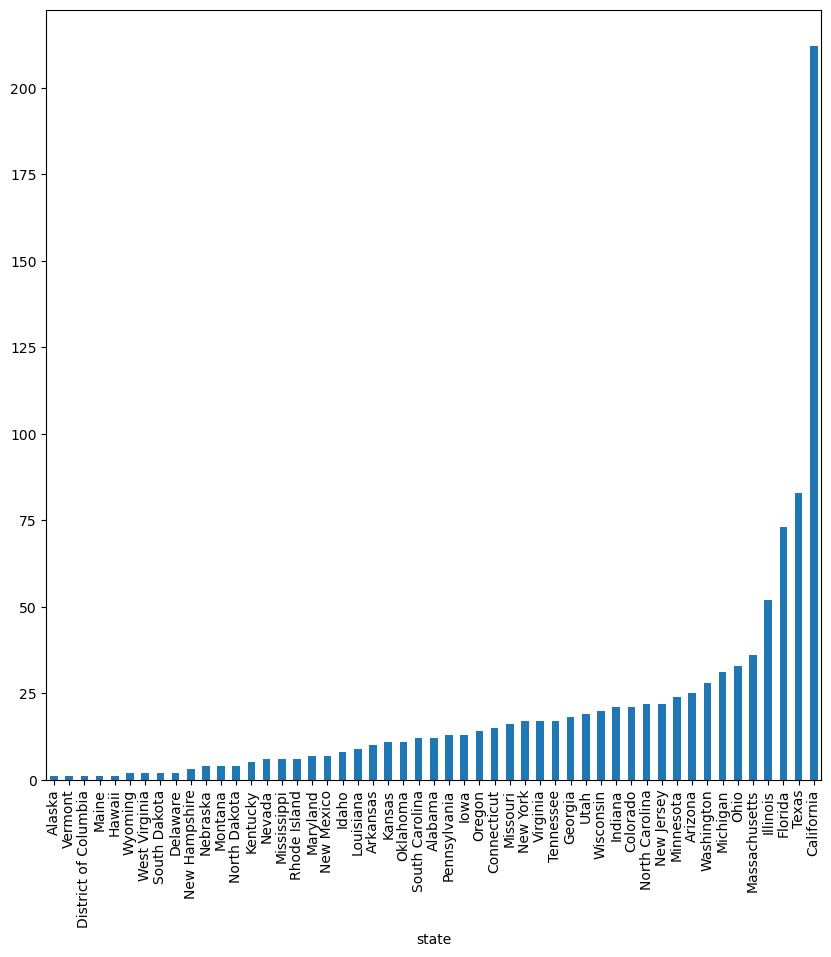

In [850]:
df.groupby('state')['city'].count().sort_values().plot.bar(figsize=(10, 10))

<Axes: xlabel='longitude', ylabel='latitude'>

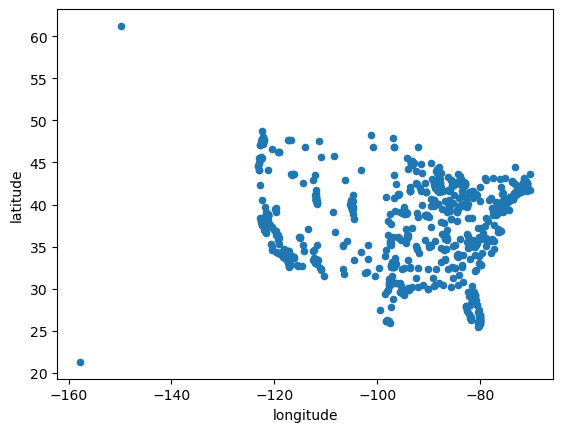

In [852]:
df.plot.scatter(x='longitude', y='latitude')

In [854]:
s = pd.Series([1, 2, 3, 4], index=['d', 'b', 'a', 'c'])
s

d    1
b    2
a    3
c    4
dtype: int64

In [856]:
s.reindex(['a', 'b', 'c', 'd', 'e'])

a    3.0
b    2.0
c    4.0
d    1.0
e    NaN
dtype: float64

In [858]:
s = pd.Series([1, 2, 3, np.nan, 0])

In [860]:
s.isna()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [862]:
s.notna()

0     True
1     True
2     True
3    False
4     True
dtype: bool

### get_dummies: when you feel like to make indicator variables from a categorical variable

Here is a good'ol example below.

In [867]:
df = pd.DataFrame({'key': ['b', 'b', 'c', 'a', 'c', 'b', 'd'],
                   'values': [0, 1, 2, 3, 4, 5, 6]})
df

,key,values
0,b,0
1,b,1
2,c,2
3,a,3
4,c,4
5,b,5
6,d,6


In [869]:
pd.get_dummies(df['key'])

,a,b,c,d
0,False,True,False,False
1,False,True,False,False
2,False,False,True,False
3,True,False,False,False
4,False,False,True,False
5,False,True,False,False
6,False,False,False,True


In [873]:
dummies = pd.get_dummies(df['key'], prefix='key').astype(int)
df_with_dummies = df[['values']].join(dummies)
df_with_dummies

,values,key_a,key_b,key_c,key_d
0,0,0,1,0,0
1,1,0,1,0,0
2,2,0,0,1,0
3,3,1,0,0,0
4,4,0,0,1,0
5,5,0,1,0,0
6,6,0,0,0,1


### Hint of using Regex

In [878]:
data = {"Dave": "dave@google.com", "Steve": "steve@gmail.com", "Rob": "rob@gmail.com", "Wes": np.nan}
s = pd.Series(data)
s

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [880]:
s.isna()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [882]:
s.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [884]:
s_string = s.astype('string')
s_string

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                 <NA>
dtype: string

In [894]:
import re
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [896]:
s.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

### Multi-index stacking and unstacking

In [899]:
s = pd.Series(np.random.uniform(size=9),
              index=[["a", "a", "a", "b", "b", "c", "c", "d", "d"],
                     [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [901]:
s

a  1    0.811496
   2    0.957101
   3    0.468263
b  1    0.453360
   3    0.929144
c  1    0.847839
   2    0.721437
d  2    0.722983
   3    0.649156
dtype: float64

If unstack this series,

In [904]:
s.unstack()

,1,2,3
a,0.811496,0.957101,0.468263
b,0.453360,NaN,0.929144
c,0.847839,0.721437,NaN
d,NaN,0.722983,0.649156


In [906]:
s.unstack().stack()

a  1    0.811496
   2    0.957101
   3    0.468263
b  1    0.453360
   3    0.929144
c  1    0.847839
   2    0.721437
d  2    0.722983
   3    0.649156
dtype: float64

In [914]:
df = pd.DataFrame(np.random.uniform(size=12).reshape((4, 3)),
                  index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
                  columns=[["CA", "NY", "DC"], ["R", "G", "B"]])
df

CA        NY        DC
            R         G         B
a 1  0.915691  0.590421  0.471572
  2  0.335030  0.544201  0.454967
b 1  0.140271  0.320041  0.895973
  2  0.458863  0.568987  0.802539

In [918]:
df.index.names = ["k1", "k2"]

In [924]:
df.columns.names = ["state", "color"]

In [926]:
df

state        CA        NY        DC
color         R         G         B
k1 k2                              
a  1   0.915691  0.590421  0.471572
   2   0.335030  0.544201  0.454967
b  1   0.140271  0.320041  0.895973
   2   0.458863  0.568987  0.802539

### `swaplevel`: reordering index levels

In [933]:
df.swaplevel(0, 1, axis=1)

color         R         G         B
state        CA        NY        DC
k1 k2                              
a  1   0.915691  0.590421  0.471572
   2   0.335030  0.544201  0.454967
b  1   0.140271  0.320041  0.895973
   2   0.458863  0.568987  0.802539

### `merge`: combine datasets by linking rows

In [939]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": pd.Series(range(3), dtype="Int64")})

In [941]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [943]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [945]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [959]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,<NA>
7,d,<NA>,2


### `join`: simply merge DataFrames by their index

### `concat`

In [961]:
s1 = pd.Series([0, 1], index=["a", "b"], dtype="Int64")
s2 = pd.Series([2, 3, 4], index=["c", "d", "e"], dtype="Int64")
s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64")

In [965]:
s1, s2, s3

(a    0
 b    1
 dtype: Int64,
 c    2
 d    3
 e    4
 dtype: Int64,
 f    5
 g    6
 dtype: Int64)

In [969]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: Int64

In [971]:
pd.concat([s1, s2, s3], axis='columns')

,0,1,2
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [973]:
df1 = pd.DataFrame(np.random.standard_normal((3, 4)),
                   columns=["a", "b", "c", "d"])
df2 = pd.DataFrame(np.random.standard_normal((2, 3)),
                   columns=["b", "d", "a"])

In [975]:
pd.concat([df1, df2])

,a,b,c,d
0,0.337648,-0.431348,-0.358852,0.812250
1,0.094747,0.815966,-0.246446,3.570907
2,0.227568,-1.373108,-0.782034,-0.341158
0,1.405397,1.079200,NaN,-1.655905
1,0.340838,0.201087,NaN,-0.414370


In [977]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.337648,-0.431348,-0.358852,0.812250
1,0.094747,0.815966,-0.246446,3.570907
2,0.227568,-1.373108,-0.782034,-0.341158
3,1.405397,1.079200,NaN,-1.655905
4,0.340838,0.201087,NaN,-0.414370


In [981]:
pd.concat([df1, df2], axis='columns')

,a,b,c,d,b,d,a
0,0.337648,-0.431348,-0.358852,0.812250,1.079200,-1.655905,1.405397
1,0.094747,0.815966,-0.246446,3.570907,0.201087,-0.414370,0.340838
2,0.227568,-1.373108,-0.782034,-0.341158,NaN,NaN,NaN


### `combine_first`: "patching" missing data in df1 by df2

In [984]:
df1 = pd.DataFrame({"a": [1., np.nan, 5., np.nan],
                    "b": [np.nan, 2., np.nan, 6.],
                   "c": range(2, 18, 4)})
df2 = pd.DataFrame({"a": [5., 4., np.nan, 3., 7.],
                    "b": [np.nan, 3., 4., 6., 8.]})

In [986]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [988]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [990]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN
